## INDIA

In [12]:
# !pip install tensorflow

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.core import Dense, Activation, Dropout
# from keras.layers import LST
from keras.models import Sequential

from tensorflow.keras.layers import LSTM


In [14]:
df = pd.read_csv("INDIA.csv")
print("="*50)
print("First Five Rows ","\n")
print(df.head(2),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

             Datetime Month  Year       Date  Consumption    Solar     Wind  \
0  2018-4-26 11:36:15   Apr  2018  Apr, 2018  93618.90476  3178.89  3322.75   
1  2018-5-30 08:02:54   May  2018  May, 2018  93618.90476  3312.32  4451.49   

   Others (Biomass, Bagasse, Small Hydel, Etc.)  \
0                                       1942.15   
1                                       1492.66   

   Total RE Generated (Energy Saved)  Cost Saved (IN Crores)  
0                            8443.79               439.07708  
1                            9256.47               481.33644   

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Datetime                                      57 non-null     object 
 1   Month                                

In [15]:
# Select only the two columns of interest
selected_columns = ['Datetime','Consumption', 'Total RE Generated (Energy Saved)']
dff = df[selected_columns]

# Print the resulting dataframe
# print(dff)

print("="*50)
print("First Five Rows ","\n")
print(dff.head(2),"\n")

print("="*50)
print("Information About Dataset","\n")
print(dff.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(dff.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(dff.isnull().sum(),"\n")

First Five Rows  

             Datetime  Consumption  Total RE Generated (Energy Saved)
0  2018-4-26 11:36:15  93618.90476                            8443.79
1  2018-5-30 08:02:54  93618.90476                            9256.47 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Datetime                           57 non-null     object 
 1   Consumption                        57 non-null     float64
 2   Total RE Generated (Energy Saved)  57 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB
None 

Describe the Dataset  

         Consumption  Total RE Generated (Energy Saved)
count      57.000000                          57.000000
mean   100592.257109                       12859.402456
std      3338.627937                        3190.250397
min     9361

In [16]:
# Extract all Data Like Year MOnth Day Time etc
datasett = df
dataset = dff
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = dff.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)

/tmp/ipykernel_29540/2799729664.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
/tmp/ipykernel_29540/2799729664.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
/tmp/ipykernel_29540/2799729664.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,Consumption,Total RE Generated (Energy Saved),Month,Year,Date,Time,Week,Day
Datetime,,,,,,,,
2018-04-26 11:36:15,93618.90476,8443.79,4,2018,2018-04-26,11:36:15,17,Thursday


In [17]:
dataset

,Consumption,Total RE Generated (Energy Saved),Month,Year,Date,Time,Week,Day
Datetime,,,,,,,,
2018-04-26 11:36:15,93618.90476,8443.79,4,2018,2018-04-26,11:36:15,17,Thursday
2018-05-30 08:02:54,93618.90476,9256.47,5,2018,2018-05-30,08:02:54,22,Wednesday
2018-06-17 01:34:07,93618.90476,12826.64,6,2018,2018-06-17,01:34:07,24,Sunday
2018-07-24 02:43:00,93618.90476,15687.18,7,2018,2018-07-24,02:43:00,30,Tuesday
2018-08-21 15:52:25,93618.90476,16374.82,8,2018,2018-08-21,15:52:25,34,Tuesday
2018-09-16 18:05:07,93618.90476,10738.01,9,2018,2018-09-16,18:05:07,37,Sunday
2018-10-25 04:01:49,93618.90476,7815.23,10,2018,2018-10-25,04:01:49,43,Thursday
2018-11-02 13:37:37,93618.90476,7902.52,11,2018,2018-11-02,13:37:37,44,Friday
2018-12-02 17:53:20,93618.90476,9083.29,12,2018,2018-12-02,17:53:20,48,Sunday


In [18]:
# How many Unique Year do we Have in Dataset 
print(dff.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2018 2019 2020 2021 2022] 

Total Number of Unique Year 5 



In [19]:
## ValueError: cannot reindex on an axis with duplicate labels
dataset = dataset.loc[~dataset.index.duplicated()]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Energy Consumption According to Year')

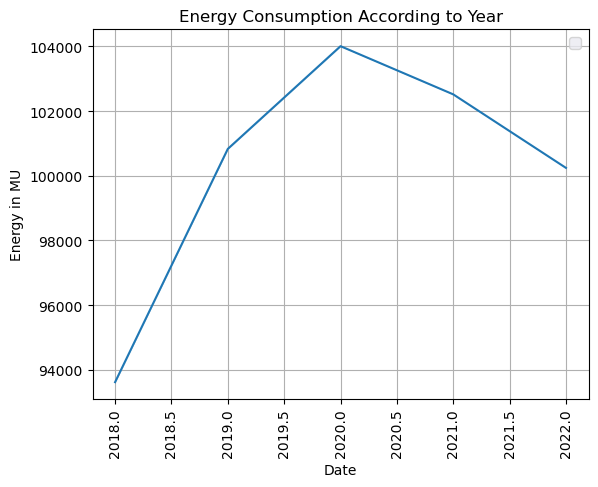

In [20]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["Consumption"], data=dff)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2018")
plt.xlabel("Date")
plt.ylabel("Energy in MU")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

/tmp/ipykernel_29540/3148789202.py:14: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_2018 = dataset["2018"]["Total RE Generated (Energy Saved)"].to_list()
/tmp/ipykernel_29540/3148789202.py:15: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  x_2018 = dataset["2018"]["Date"].to_list()
/tmp/ipykernel_29540/3148789202.py:19: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_2019 = dataset["2019"]["Total RE Generated (Energy Saved)"].to_list()
/tmp/ipykernel_29540/3148789202.py:20: FutureWarnin

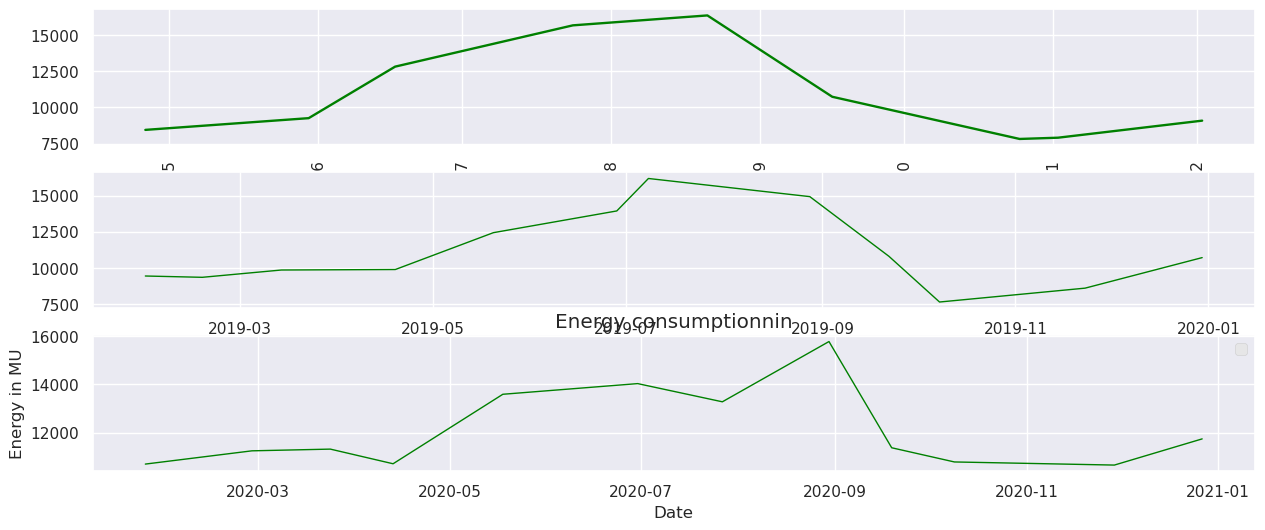

In [21]:
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)
# ax4= fig.add_subplot(313)
# ax5= fig.add_subplot(313)

style.use('ggplot')

y_2018 = dataset["2018"]["Total RE Generated (Energy Saved)"].to_list()
x_2018 = dataset["2018"]["Date"].to_list()
ax1.plot(x_2018,y_2018, color="green", linewidth=1.7)


y_2019 = dataset["2019"]["Total RE Generated (Energy Saved)"].to_list()
x_2019 = dataset["2019"]["Date"].to_list()
ax2.plot(x_2019, y_2019, color="green", linewidth=1)


y_2020 = dataset["2020"]["Total RE Generated (Energy Saved)"].to_list()
x_2020 = dataset["2020"]["Date"].to_list()
ax3.plot(x_2020, y_2020, color="green", linewidth=1)


# y_2021 = dataset["2021"]["Total RE Generated (Energy Saved)"].to_list()
# x_2021 = dataset["2021"]["Date"].to_list()
# ax4.plot(x_2021, y_2021, color="green", linewidth=1)


# y_2022 = dataset["2022"]["Total RE Generated (Energy Saved)"].to_list()
# x_2022 = dataset["2022"]["Date"].to_list()
# ax5.plot(x_2022, y_2022, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (18,8)
plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in MU")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_29540/1231461587.py:16: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_re = dataset[year]["Total RE Generated (Energy Saved)"].to_list()
/tmp/ipykernel_29540/1231461587.py:17: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  x_re = dataset[year]["Date"].to_list()
/tmp/ipykernel_29540/1231461587.py:19: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `fram

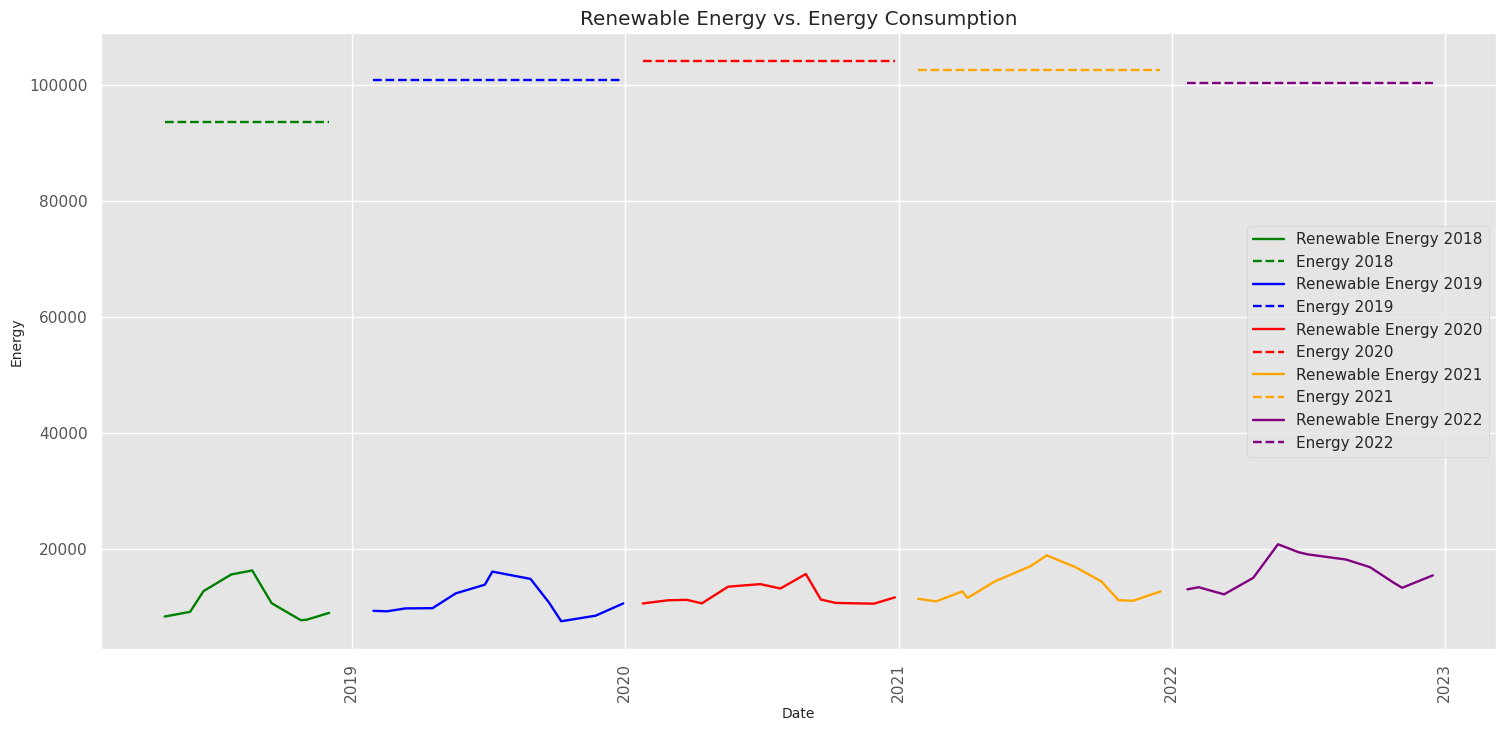

In [22]:
from matplotlib import style

style.use('ggplot')

years = ["2018", "2019", "2020", "2021", "2022"]
colors = ["green", "blue", "red", "orange", "purple"]

plt.xlabel("Date")
plt.ylabel("Energy")
plt.title("Renewable Energy vs. Energy Consumption")
plt.grid(True, alpha=1)
plt.xticks(rotation=90)
plt.legend()

for i, year in enumerate(years):
    y_re = dataset[year]["Total RE Generated (Energy Saved)"].to_list()
    x_re = dataset[year]["Date"].to_list()

    y_consumption = dataset[year]["Consumption"].to_list()
    x_consumption = dataset[year]["Date"].to_list()

    plt.plot(x_re, y_re, color=colors[i], linewidth=1.7, label=f"Renewable Energy {year}")
    plt.plot(x_consumption, y_consumption, color=colors[i], linewidth=1.7, linestyle="--", label=f"Energy {year}")

plt.rcParams["figure.figsize"] = (18, 8)
plt.legend()
plt.show()


## Energy Distribution

/tmp/ipykernel_29540/1842333175.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Consumption"])


Text(0.5, 1.0, 'Consumption Energy Distribution [MU]')

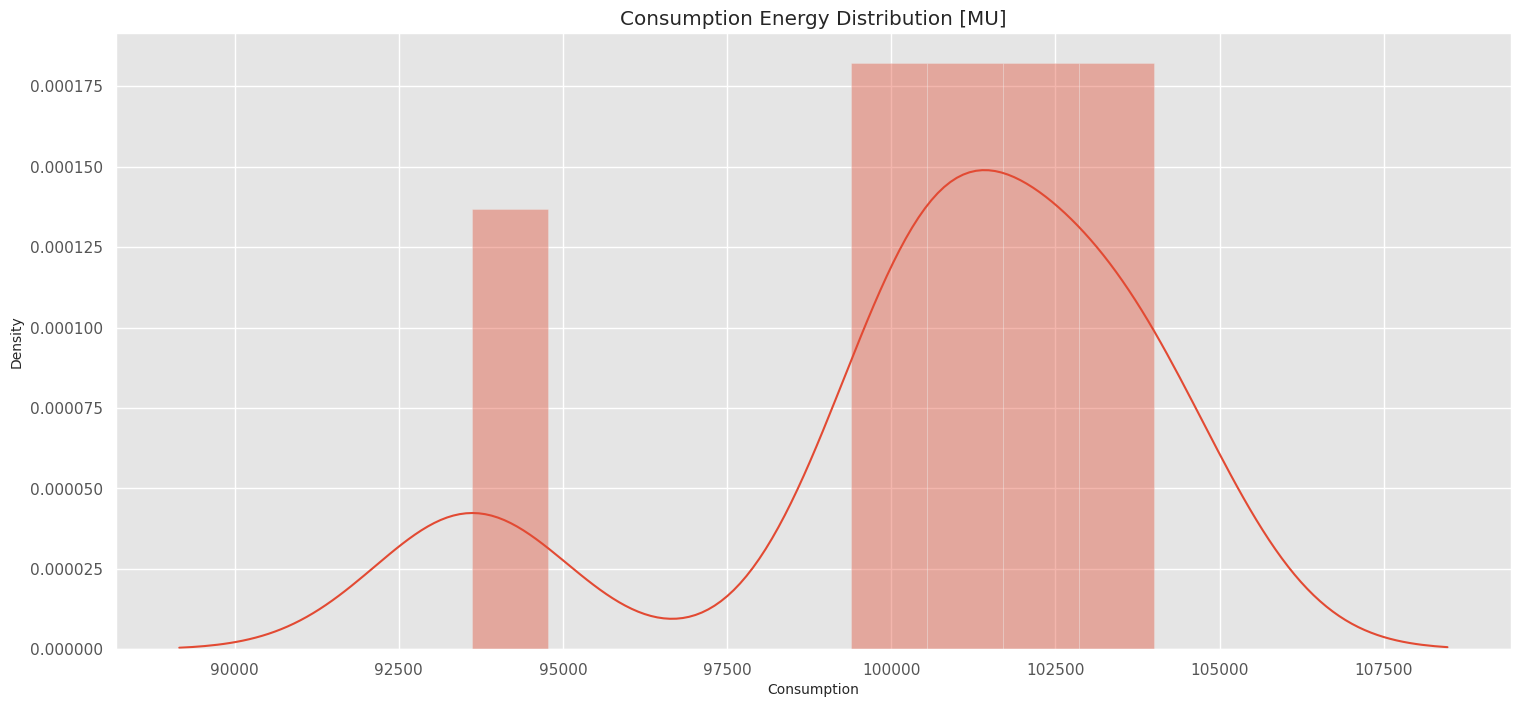

In [23]:
sns.distplot(dataset["Consumption"])
plt.title("Consumption Energy Distribution [MU]")

/tmp/ipykernel_29540/4102279045.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Total RE Generated (Energy Saved)"])


Text(0.5, 1.0, 'Renewable Energy Distribution [MU]')

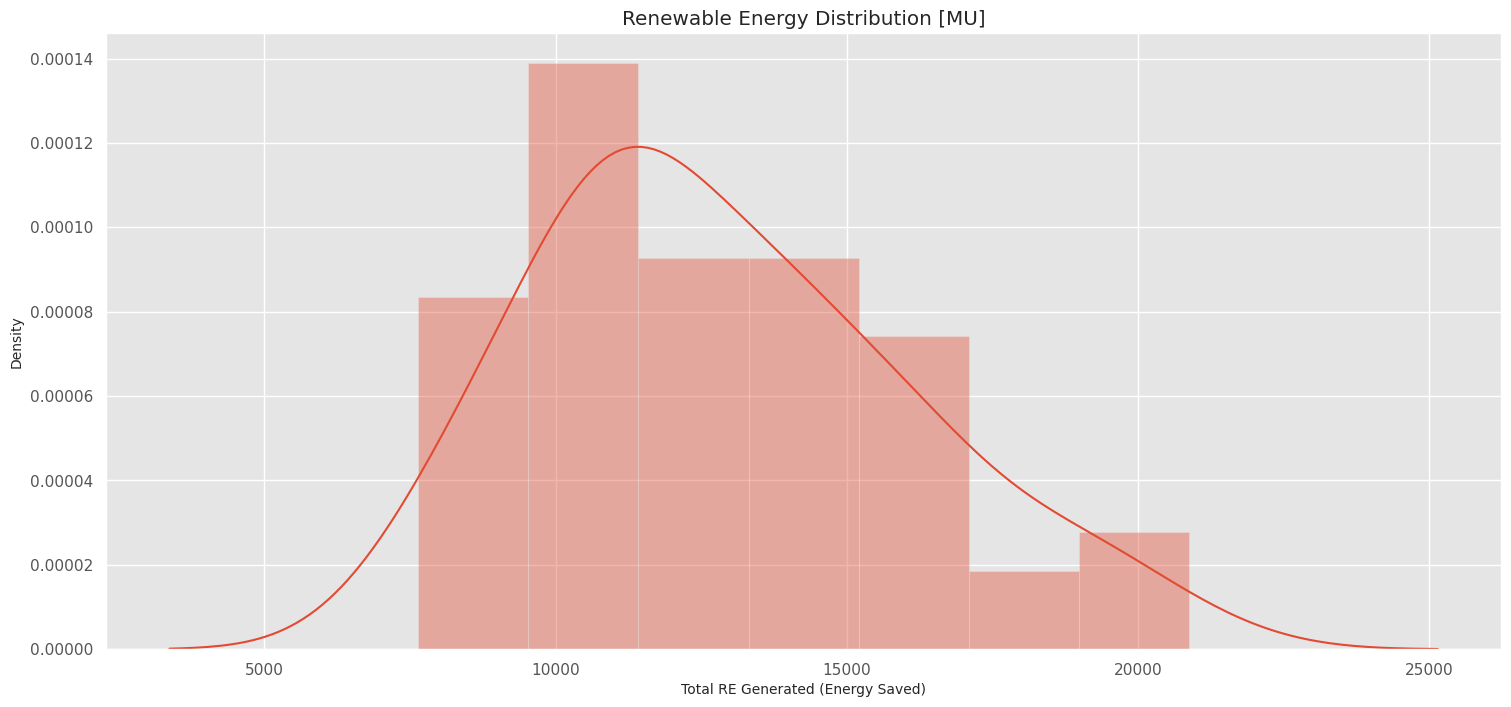

In [24]:
sns.distplot(dataset["Total RE Generated (Energy Saved)"])
plt.title("Renewable Energy Distribution [MU]")

## Energy with Respect to Time

In [25]:
# df
# dataset
dataset['Time'] = pd.to_datetime(dataset['Time'], format='%H:%M:%S')
# dataset

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


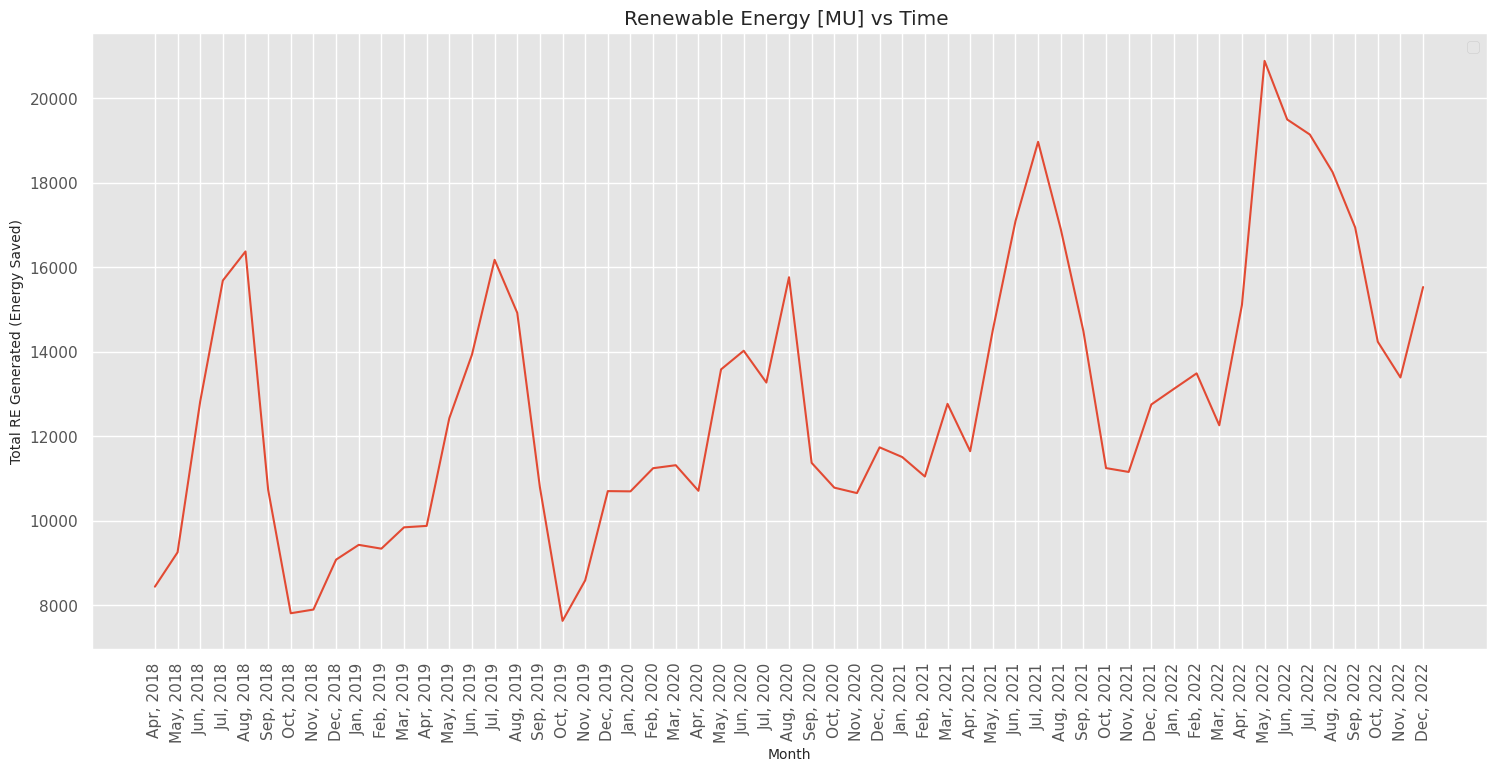

In [26]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=datasett["Date"],y=datasett["Total RE Generated (Energy Saved)"], data=df)
# plt.plot(dataset["Time"], dataset["Consumption"])
plt.title("Renewable Energy [MU] vs Time ")
plt.xlabel("Month")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


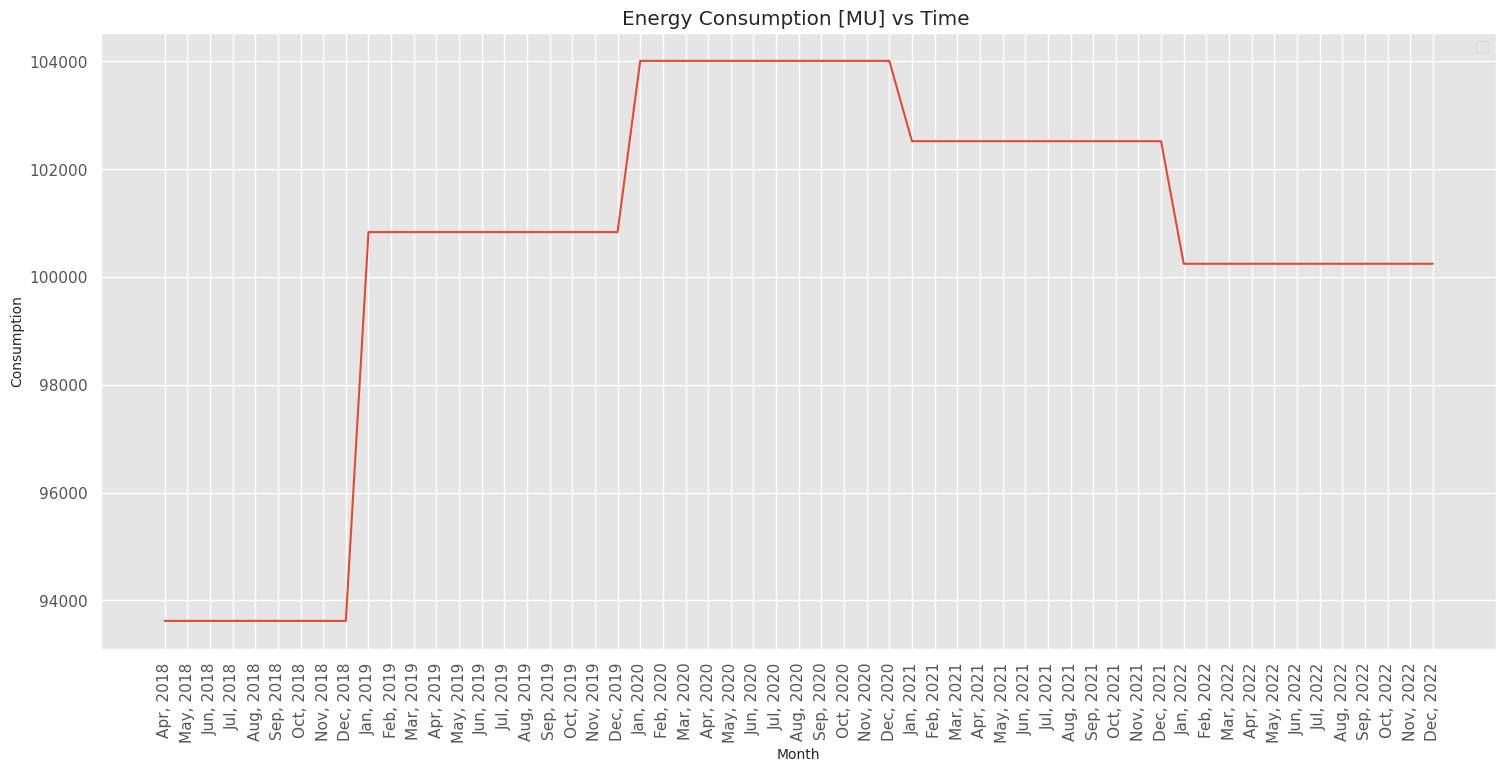

In [27]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=datasett["Date"],y=datasett["Consumption"], data=df)
# plt.plot(dataset["Time"], dataset["Consumption"])
plt.title("Energy Consumption [MU] vs Time ")
plt.xlabel("Month")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

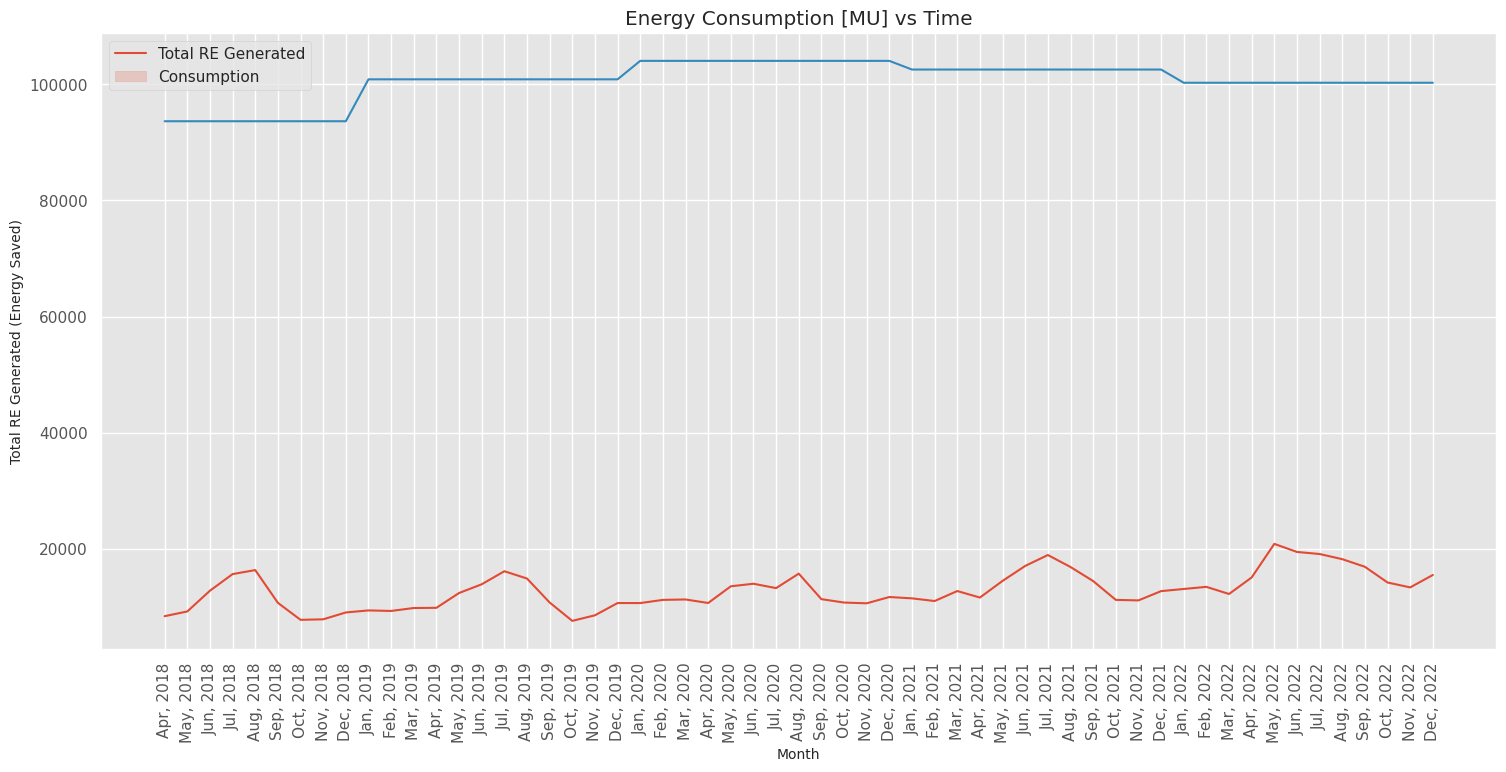

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
ax1 = fig.add_subplot(111)

sns.lineplot(x=datasett["Date"], y=datasett["Total RE Generated (Energy Saved)"], data=df, ax=ax1)
sns.lineplot(x=datasett["Date"], y=datasett["Consumption"], data=df, ax=ax1)

plt.title("Energy Consumption [MU] vs Time")
plt.xlabel("Month")
plt.grid(True, alpha=1)
plt.legend(["Total RE Generated", "Consumption"])

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

plt.show()


## Resampleing Data
Consumption only

In [29]:
NewDataSet = dataset.resample('D').mean()

/tmp/ipykernel_29540/2859532632.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  NewDataSet = dataset.resample('D').mean()


In [30]:
NewDataSet

,Consumption,Total RE Generated (Energy Saved),Month,Year,Week
Datetime,,,,,
2018-04-26,93618.90476,8443.79,4.0,2018.0,17.0
2018-04-27,NaN,NaN,NaN,NaN,NaN
2018-04-28,NaN,NaN,NaN,NaN,NaN
2018-04-29,NaN,NaN,NaN,NaN,NaN
2018-04-30,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-12-12,NaN,NaN,NaN,NaN,NaN
2022-12-13,NaN,NaN,NaN,NaN,NaN
2022-12-14,NaN,NaN,NaN,NaN,NaN


In [31]:
# Load the dataframe
# df = pd.read_csv('your_data.csv')
df = NewDataSet
# Convert the 'Datetime' column to datetime format
# df['Datetime'] = pd.to_datetime(df['Datetime'])

# Sort the dataframe by the 'Datetime' column
df = df.sort_values('Datetime')

# Forward fill the NaN values in the 'Month', 'Year', and 'Week' columns
df['Month'] = df['Month'].fillna(method='ffill')
df['Year'] = df['Year'].fillna(method='ffill')
df['Week'] = df['Week'].fillna(method='ffill')

# Print the updated dataframe
NewDataSet = df


In [32]:
NewDataSet

,Consumption,Total RE Generated (Energy Saved),Month,Year,Week
Datetime,,,,,
2018-04-26,93618.90476,8443.79,4.0,2018.0,17.0
2018-04-27,NaN,NaN,4.0,2018.0,17.0
2018-04-28,NaN,NaN,4.0,2018.0,17.0
2018-04-29,NaN,NaN,4.0,2018.0,17.0
2018-04-30,NaN,NaN,4.0,2018.0,17.0
...,...,...,...,...,...
2022-12-12,NaN,NaN,11.0,2022.0,44.0
2022-12-13,NaN,NaN,11.0,2022.0,44.0
2022-12-14,NaN,NaN,11.0,2022.0,44.0


In [33]:
df = NewDataSet

In [34]:
import numpy as np
import pandas as pd

# Calculate the mean and standard deviation of the electricity consumption column
mean = df['Consumption'].mean()
std = df['Consumption'].std()

# Set the range for random values (e.g., within 1 standard deviation of the mean)
lower_limit = mean - std
upper_limit = mean + std

# Generate random values within the specified range
random_values = np.random.uniform(lower_limit, upper_limit, df['Consumption'].isnull().sum())

# Replace NaN values with the generated random values
df.loc[df['Consumption'].isnull(), 'Consumption'] = random_values

# Print the updated DataFrame
df

,Consumption,Total RE Generated (Energy Saved),Month,Year,Week
Datetime,,,,,
2018-04-26,93618.904760,8443.79,4.0,2018.0,17.0
2018-04-27,101717.351666,NaN,4.0,2018.0,17.0
2018-04-28,98290.555658,NaN,4.0,2018.0,17.0
2018-04-29,103650.688186,NaN,4.0,2018.0,17.0
2018-04-30,99523.337632,NaN,4.0,2018.0,17.0
...,...,...,...,...,...
2022-12-12,99579.755735,NaN,11.0,2022.0,44.0
2022-12-13,97377.060345,NaN,11.0,2022.0,44.0
2022-12-14,102982.970800,NaN,11.0,2022.0,44.0


In [35]:
df.shape
NewDataSet = df

In [36]:
print("Old Dataset ",dataset.shape)
print("New  Dataset ",NewDataSet.shape)

Old Dataset  (57, 8)
New  Dataset  (1696, 5)


In [37]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [38]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (1636, 1)
Test Set Shape  (100, 5)


In [39]:
print(Training_Set)

              Consumption
Datetime                 
2018-04-26   93618.904760
2018-04-27  101717.351666
2018-04-28   98290.555658
2018-04-29  103650.688186
2018-04-30   99523.337632
...                   ...
2022-10-13  102849.438836
2022-10-14   97752.312879
2022-10-15  102972.627696
2022-10-16  100573.359802
2022-10-17  103627.511850

[1636 rows x 1 columns]


In [40]:
print(TestData)

              Consumption  Total RE Generated (Energy Saved)  Month    Year  \
Datetime                                                                      
2022-09-08   98254.200131                                NaN    8.0  2022.0   
2022-09-09   99928.757139                                NaN    8.0  2022.0   
2022-09-10   97580.258783                                NaN    8.0  2022.0   
2022-09-11  101072.263593                                NaN    8.0  2022.0   
2022-09-12  101227.396255                                NaN    8.0  2022.0   
...                   ...                                ...    ...     ...   
2022-12-12   99579.755735                                NaN   11.0  2022.0   
2022-12-13   97377.060345                                NaN   11.0  2022.0   
2022-12-14  102982.970800                                NaN   11.0  2022.0   
2022-12-15   99864.840939                                NaN   11.0  2022.0   
2022-12-16  100243.589500                           

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [43]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(1576, 60, 1)
(1576, 1)


In [44]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(1576, 60, 1)

## Model

In [45]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

2023-06-01 18:34:47.538600: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-01 18:34:47.540419: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-01 18:34:47.541639: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [46]:
regressor.fit(X_Train, Y_Train, epochs = 1000, batch_size = 64)

Epoch 1/1000


2023-06-01 18:34:55.352958: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-01 18:34:55.354837: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-01 18:34:55.356121: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

25/25 [==============================] - 8s 91ms/step - loss: 0.1189
Epoch 2/1000
25/25 [==============================] - 2s 97ms/step - loss: 0.0436
Epoch 3/1000
25/25 [==============================] - 2s 92ms/step - loss: 0.0433
Epoch 4/1000
25/25 [==============================] - 2s 91ms/step - loss: 0.0422
Epoch 5/1000
25/25 [==============================] - 3s 101ms/step - loss: 0.0419
Epoch 6/1000
25/25 [==============================] - 2s 95ms/step - loss: 0.0408
Epoch 7/1000
25/25 [==============================] - 2s 99ms/step - loss: 0.0401
Epoch 8/1000
25/25 [==============================] - 2s 95ms/step - loss: 0.0411
Epoch 9/1000
25/25 [==============================] - 3s 100ms/step - loss: 0.0412
Epoch 10/1000
25/25 [==============================] - 3s 101ms/step - loss: 0.0415
Epoch 11/1000
25/25 [==============================] - 3s 105ms/step - loss: 0.0412
Epoch 12/1000
25/25 [==============================] - 3s 106ms/step - loss: 0.0400
Epoch 13/1000
25/25 [

25/25 [==============================] - 3s 126ms/step - loss: 0.0389
Epoch 99/1000
25/25 [==============================] - 3s 120ms/step - loss: 0.0393
Epoch 100/1000
25/25 [==============================] - 3s 106ms/step - loss: 0.0386
Epoch 101/1000
25/25 [==============================] - 3s 102ms/step - loss: 0.0385
Epoch 102/1000
25/25 [==============================] - 3s 104ms/step - loss: 0.0391
Epoch 103/1000
25/25 [==============================] - 3s 108ms/step - loss: 0.0383
Epoch 104/1000
25/25 [==============================] - 3s 113ms/step - loss: 0.0381
Epoch 105/1000
25/25 [==============================] - 3s 104ms/step - loss: 0.0382
Epoch 106/1000
25/25 [==============================] - 3s 104ms/step - loss: 0.0391
Epoch 107/1000
25/25 [==============================] - 3s 111ms/step - loss: 0.0382
Epoch 108/1000
25/25 [==============================] - 3s 105ms/step - loss: 0.0378
Epoch 109/1000
25/25 [==============================] - 3s 101ms/step - loss: 0.0

25/25 [==============================] - 3s 109ms/step - loss: 0.0377
Epoch 195/1000
25/25 [==============================] - 3s 110ms/step - loss: 0.0371
Epoch 196/1000
25/25 [==============================] - 3s 103ms/step - loss: 0.0377
Epoch 197/1000
25/25 [==============================] - 3s 104ms/step - loss: 0.0378
Epoch 198/1000
25/25 [==============================] - 3s 107ms/step - loss: 0.0378
Epoch 199/1000
25/25 [==============================] - 3s 104ms/step - loss: 0.0381
Epoch 200/1000
25/25 [==============================] - 3s 104ms/step - loss: 0.0378
Epoch 201/1000
25/25 [==============================] - 3s 108ms/step - loss: 0.0379
Epoch 202/1000
25/25 [==============================] - 3s 105ms/step - loss: 0.0380
Epoch 203/1000
25/25 [==============================] - 3s 108ms/step - loss: 0.0373
Epoch 204/1000
25/25 [==============================] - 3s 102ms/step - loss: 0.0374
Epoch 205/1000
25/25 [==============================] - 3s 103ms/step - loss: 0.

25/25 [==============================] - 3s 111ms/step - loss: 0.0369
Epoch 291/1000
25/25 [==============================] - 3s 107ms/step - loss: 0.0367
Epoch 292/1000
25/25 [==============================] - 3s 116ms/step - loss: 0.0373
Epoch 293/1000
25/25 [==============================] - 3s 108ms/step - loss: 0.0370
Epoch 294/1000
25/25 [==============================] - 3s 111ms/step - loss: 0.0371
Epoch 295/1000
25/25 [==============================] - 3s 111ms/step - loss: 0.0368
Epoch 296/1000
25/25 [==============================] - 3s 121ms/step - loss: 0.0367
Epoch 297/1000
25/25 [==============================] - 3s 129ms/step - loss: 0.0369
Epoch 298/1000
25/25 [==============================] - 3s 134ms/step - loss: 0.0367
Epoch 299/1000
25/25 [==============================] - 3s 115ms/step - loss: 0.0372
Epoch 300/1000
25/25 [==============================] - 3s 122ms/step - loss: 0.0369
Epoch 301/1000
25/25 [==============================] - 3s 122ms/step - loss: 0.

25/25 [==============================] - 3s 106ms/step - loss: 0.0367
Epoch 387/1000
25/25 [==============================] - 3s 103ms/step - loss: 0.0363
Epoch 388/1000
25/25 [==============================] - 2s 99ms/step - loss: 0.0366
Epoch 389/1000
25/25 [==============================] - 3s 134ms/step - loss: 0.0364
Epoch 390/1000
25/25 [==============================] - 3s 103ms/step - loss: 0.0363
Epoch 391/1000
25/25 [==============================] - 3s 115ms/step - loss: 0.0365
Epoch 392/1000
25/25 [==============================] - 3s 106ms/step - loss: 0.0366
Epoch 393/1000
25/25 [==============================] - 3s 104ms/step - loss: 0.0363
Epoch 394/1000
25/25 [==============================] - 3s 105ms/step - loss: 0.0363
Epoch 395/1000
25/25 [==============================] - 3s 103ms/step - loss: 0.0363
Epoch 396/1000
25/25 [==============================] - 2s 98ms/step - loss: 0.0361
Epoch 397/1000
25/25 [==============================] - 3s 108ms/step - loss: 0.03

25/25 [==============================] - 4s 142ms/step - loss: 0.0351
Epoch 483/1000
25/25 [==============================] - 4s 155ms/step - loss: 0.0357
Epoch 484/1000
25/25 [==============================] - 3s 125ms/step - loss: 0.0359
Epoch 485/1000
25/25 [==============================] - 3s 133ms/step - loss: 0.0359
Epoch 486/1000
25/25 [==============================] - 3s 131ms/step - loss: 0.0354
Epoch 487/1000
25/25 [==============================] - 4s 149ms/step - loss: 0.0350
Epoch 488/1000
25/25 [==============================] - 4s 157ms/step - loss: 0.0353
Epoch 489/1000
25/25 [==============================] - 3s 131ms/step - loss: 0.0353
Epoch 490/1000
25/25 [==============================] - 3s 132ms/step - loss: 0.0364
Epoch 491/1000
25/25 [==============================] - 3s 126ms/step - loss: 0.0357
Epoch 492/1000
25/25 [==============================] - 3s 132ms/step - loss: 0.0355
Epoch 493/1000
25/25 [==============================] - 4s 156ms/step - loss: 0.

25/25 [==============================] - 3s 110ms/step - loss: 0.0327
Epoch 579/1000
25/25 [==============================] - 3s 104ms/step - loss: 0.0334
Epoch 580/1000
25/25 [==============================] - 3s 100ms/step - loss: 0.0323
Epoch 581/1000
25/25 [==============================] - 3s 115ms/step - loss: 0.0326
Epoch 582/1000
25/25 [==============================] - 4s 149ms/step - loss: 0.0330
Epoch 583/1000
25/25 [==============================] - 4s 151ms/step - loss: 0.0320
Epoch 584/1000
25/25 [==============================] - 3s 126ms/step - loss: 0.0320
Epoch 585/1000
25/25 [==============================] - 3s 101ms/step - loss: 0.0314
Epoch 586/1000
25/25 [==============================] - 3s 102ms/step - loss: 0.0327
Epoch 587/1000
25/25 [==============================] - 3s 104ms/step - loss: 0.0328
Epoch 588/1000
25/25 [==============================] - 3s 114ms/step - loss: 0.0318
Epoch 589/1000
25/25 [==============================] - 3s 105ms/step - loss: 0.

25/25 [==============================] - 3s 119ms/step - loss: 0.0236
Epoch 675/1000
25/25 [==============================] - 3s 114ms/step - loss: 0.0231
Epoch 676/1000
25/25 [==============================] - 3s 119ms/step - loss: 0.0233
Epoch 677/1000
25/25 [==============================] - 3s 110ms/step - loss: 0.0240
Epoch 678/1000
25/25 [==============================] - 3s 115ms/step - loss: 0.0245
Epoch 679/1000
25/25 [==============================] - 3s 116ms/step - loss: 0.0240
Epoch 680/1000
25/25 [==============================] - 3s 115ms/step - loss: 0.0246
Epoch 681/1000
25/25 [==============================] - 3s 106ms/step - loss: 0.0241
Epoch 682/1000
25/25 [==============================] - 3s 115ms/step - loss: 0.0239
Epoch 683/1000
25/25 [==============================] - 5s 185ms/step - loss: 0.0230
Epoch 684/1000
25/25 [==============================] - 4s 175ms/step - loss: 0.0231
Epoch 685/1000
25/25 [==============================] - 4s 158ms/step - loss: 0.

25/25 [==============================] - 3s 105ms/step - loss: 0.0187
Epoch 771/1000
25/25 [==============================] - 3s 109ms/step - loss: 0.0167
Epoch 772/1000
25/25 [==============================] - 3s 109ms/step - loss: 0.0165
Epoch 773/1000
25/25 [==============================] - 3s 110ms/step - loss: 0.0167
Epoch 774/1000
25/25 [==============================] - 3s 105ms/step - loss: 0.0163
Epoch 775/1000
25/25 [==============================] - 3s 109ms/step - loss: 0.0181
Epoch 776/1000
25/25 [==============================] - 3s 107ms/step - loss: 0.0165
Epoch 777/1000
25/25 [==============================] - 3s 107ms/step - loss: 0.0168
Epoch 778/1000
25/25 [==============================] - 3s 110ms/step - loss: 0.0149
Epoch 779/1000
25/25 [==============================] - 3s 111ms/step - loss: 0.0154
Epoch 780/1000
25/25 [==============================] - 3s 111ms/step - loss: 0.0154
Epoch 781/1000
25/25 [==============================] - 3s 110ms/step - loss: 0.

25/25 [==============================] - 4s 142ms/step - loss: 0.0108
Epoch 867/1000
25/25 [==============================] - 4s 144ms/step - loss: 0.0102
Epoch 868/1000
25/25 [==============================] - 4s 147ms/step - loss: 0.0104
Epoch 869/1000
25/25 [==============================] - 4s 147ms/step - loss: 0.0106
Epoch 870/1000
25/25 [==============================] - 3s 140ms/step - loss: 0.0108
Epoch 871/1000
25/25 [==============================] - 4s 142ms/step - loss: 0.0104
Epoch 872/1000
25/25 [==============================] - 3s 138ms/step - loss: 0.0105
Epoch 873/1000
25/25 [==============================] - 4s 146ms/step - loss: 0.0110
Epoch 874/1000
25/25 [==============================] - 4s 143ms/step - loss: 0.0105
Epoch 875/1000
25/25 [==============================] - 4s 141ms/step - loss: 0.0114
Epoch 876/1000
25/25 [==============================] - 4s 144ms/step - loss: 0.0106
Epoch 877/1000
25/25 [==============================] - 4s 145ms/step - loss: 0.

25/25 [==============================] - 4s 148ms/step - loss: 0.0121
Epoch 963/1000
25/25 [==============================] - 4s 153ms/step - loss: 0.0095
Epoch 964/1000
25/25 [==============================] - 4s 153ms/step - loss: 0.0090
Epoch 965/1000
25/25 [==============================] - 4s 152ms/step - loss: 0.0085
Epoch 966/1000
25/25 [==============================] - 4s 151ms/step - loss: 0.0080
Epoch 967/1000
25/25 [==============================] - 4s 150ms/step - loss: 0.0083
Epoch 968/1000
25/25 [==============================] - 4s 149ms/step - loss: 0.0077
Epoch 969/1000
25/25 [==============================] - 4s 153ms/step - loss: 0.0080
Epoch 970/1000
25/25 [==============================] - 4s 151ms/step - loss: 0.0074
Epoch 971/1000
25/25 [==============================] - 4s 153ms/step - loss: 0.0080
Epoch 972/1000
25/25 [==============================] - 4s 152ms/step - loss: 0.0087
Epoch 973/1000
25/25 [==============================] - 4s 151ms/step - loss: 0.

In [47]:
# regressor.fit(X_Train, Y_Train, epochs = 1000, batch_size = 64)

## Test Data

In [48]:
TestData.head(2)

,Consumption,Total RE Generated (Energy Saved),Month,Year,Week
Datetime,,,,,
2022-09-08,98254.200131,NaN,8.0,2022.0,34.0
2022-09-09,99928.757139,NaN,8.0,2022.0,34.0


In [49]:
TestData.shape

(100, 5)

In [50]:
NewDataSet.shape

(1696, 5)

In [51]:
# non_zero_rows = TestData.dropna().loc[(TestData != 0).all(axis=1)]
# print(non_zero_rows)

In [52]:
Df_Total = pd.concat((NewDataSet[["Consumption"]], TestData[["Consumption"]]), axis=0)

In [53]:
Df_Total.shape

(1796, 1)

In [54]:
Df_Total

,Consumption
Datetime,
2018-04-26,93618.904760
2018-04-27,101717.351666
2018-04-28,98290.555658
2018-04-29,103650.688186
2018-04-30,99523.337632
...,...
2022-12-12,99579.755735
2022-12-13,97377.060345
2022-12-14,102982.970800


In [55]:
Df_Total.fillna(0, inplace=True)

In [56]:
Df_Total

,Consumption
Datetime,
2018-04-26,93618.904760
2018-04-27,101717.351666
2018-04-28,98290.555658
2018-04-29,103650.688186
2018-04-30,99523.337632
...,...
2022-12-12,99579.755735
2022-12-13,97377.060345
2022-12-14,102982.970800


In [57]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [58]:
inputs

array([[100756.64588164],
       [101613.4851575 ],
       [102324.13024653],
       [ 99153.94518617],
       [100896.70969022],
       [103340.0362905 ],
       [101571.1739447 ],
       [100243.5895    ],
       [101456.00005147],
       [101787.83085538],
       [ 97625.82953065],
       [ 98326.30958974],
       [101382.50087015],
       [101317.68615003],
       [ 98649.62789048],
       [ 99111.10548545],
       [101118.63060927],
       [ 97673.06249501],
       [100243.5895    ],
       [101618.87503805],
       [100893.30079983],
       [103827.10140884],
       [100405.77087306],
       [102455.44813617],
       [100997.34773351],
       [103265.80782066],
       [102607.72504639],
       [ 98211.59218388],
       [103058.89205576],
       [102720.49089558],
       [100227.14960691],
       [ 97891.14496026],
       [ 99129.10510406],
       [ 99462.93970864],
       [101635.04907023],
       [100106.15072273],
       [101353.83068379],
       [100862.03790961],
       [ 976

In [59]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_stock_price = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

2023-06-01 19:25:20.158782: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-01 19:25:20.166637: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-01 19:25:20.171693: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

4/4 [==============================] - 5s 46ms/step


In [66]:
True_MillionUnits = TestData["Consumption"].to_list()
Predicted_MillionUnits  = predicted_stock_price
dates = TestData.index.to_list()

In [61]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMillionUnits": True_MillionUnits,
    "PredictedMillionUnits":[x[0] for x in Predicted_MillionUnits ]
})

## Future Predicted

In [62]:
Machine_Df

,Date,TrueMillionUnits,PredictedMillionUnits
0,2022-09-08,98254.200131,99825.171875
1,2022-09-09,99928.757139,99805.992188
2,2022-09-10,97580.258783,100879.429688
3,2022-09-11,101072.263593,102679.007812
4,2022-09-12,101227.396255,101585.593750
...,...,...,...
95,2022-12-12,99579.755735,102151.851562
96,2022-12-13,97377.060345,103293.476562
97,2022-12-14,102982.970800,102130.531250
98,2022-12-15,99864.840939,99192.148438


In [63]:
True_MillionUnits = TestData["Consumption"].to_list()
Predicted_MillionUnits  = [x[0] for x in Predicted_MillionUnits ]
dates = TestData.index.to_list()

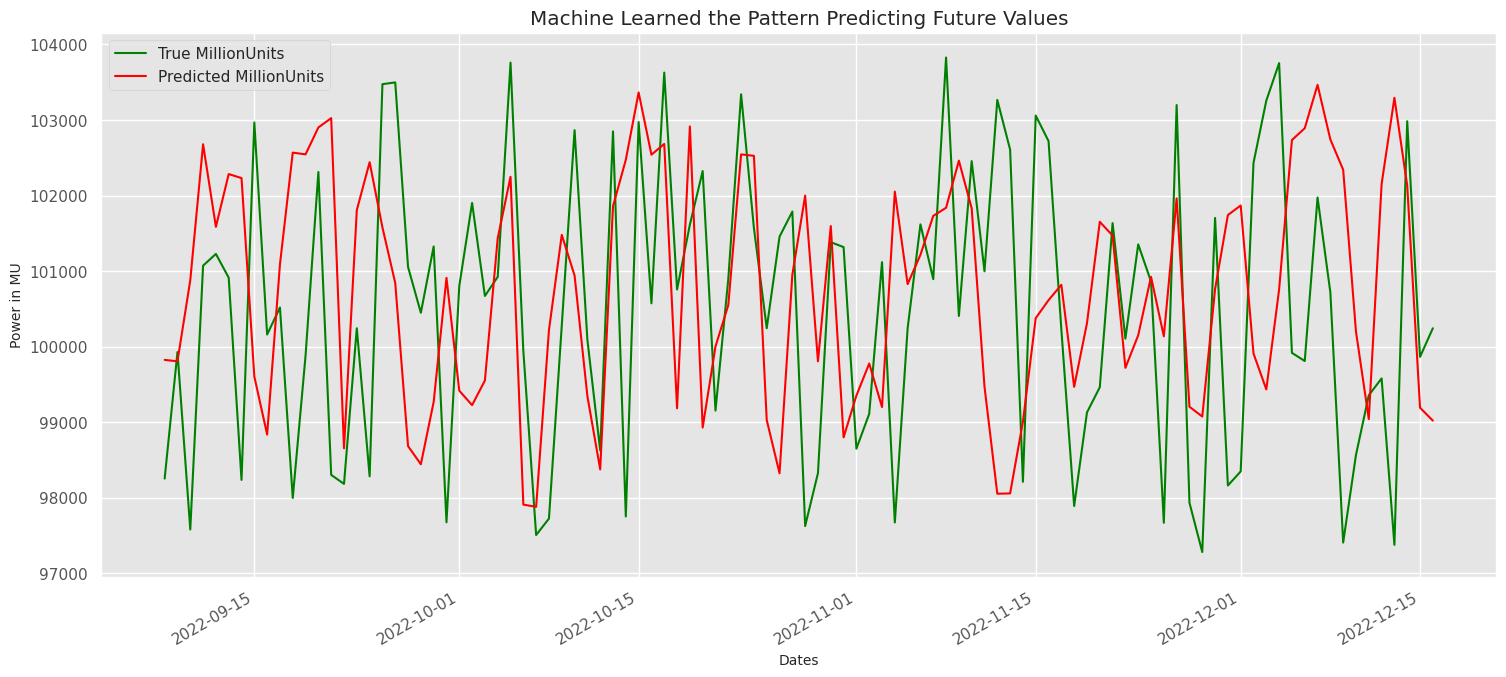

In [64]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

x = dates
y = True_MillionUnits
y1 = Predicted_MillionUnits

plt.plot(x, y, color="green", label="True MillionUnits")
plt.plot(x, y1, color="red", label="Predicted MillionUnits")

# Beautify the x-labels
plt.gcf().autofmt_xdate()

plt.xlabel('Dates')
plt.ylabel("Power in MU")
plt.title("Machine Learned the Pattern Predicting Future Values")

# Add legend
plt.legend()

plt.show()


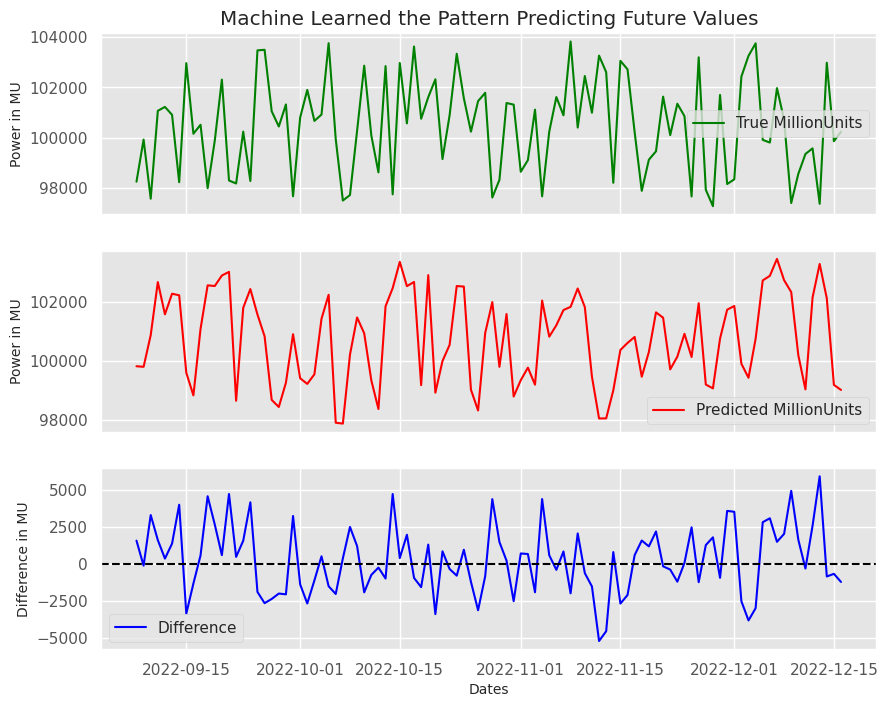

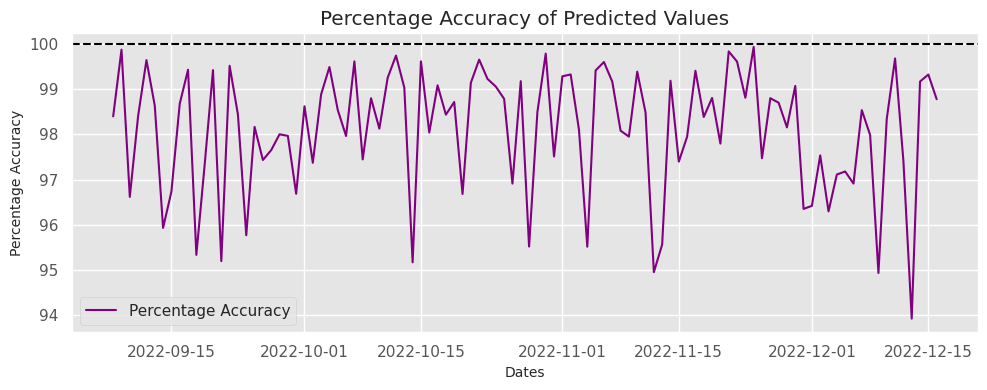

In [68]:
# True_MillionUnits = TestData["Consumption"].to_list()
# Predicted_MillionUnits = [x[0] for x in Predicted_MillionUnits]
# dates = TestData.index.to_list()

# Calculate the difference between predicted and true values
difference = [predicted - true for predicted, true in zip(Predicted_MillionUnits, True_MillionUnits)]

# Calculate percentage accuracy
percentage_accuracy = [(1 - abs(d / t)) * 100 if t != 0 else 100 for d, t in zip(difference, True_MillionUnits)]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 8))

# Plot true values
ax1.plot(dates, True_MillionUnits, color="green", label="True MillionUnits")
ax1.set_ylabel("Power in MU")
ax1.set_title("Machine Learned the Pattern Predicting Future Values")
ax1.legend()

# Plot predicted values
ax2.plot(dates, Predicted_MillionUnits, color="red", label="Predicted MillionUnits")
ax2.set_ylabel("Power in MU")
ax2.legend()

# Plot difference
ax3.plot(dates, difference, color="blue", label="Difference")
ax3.set_xlabel('Dates')
ax3.set_ylabel("Difference in MU")
ax3.axhline(0, color="black", linestyle="--")  # Add a horizontal line at y=0
ax3.legend()

# Plot percentage accuracy
fig, ax4 = plt.subplots(figsize=(10, 4))
ax4.plot(dates, percentage_accuracy, color="purple", label="Percentage Accuracy")
ax4.set_xlabel('Dates')
ax4.set_ylabel("Percentage Accuracy")
ax4.set_title("Percentage Accuracy of Predicted Values")
ax4.axhline(100, color="black", linestyle="--")  # Add a horizontal line at y=100
ax4.legend()

plt.tight_layout()
plt.show()


## Resampling Data
Renewable Energy

In [69]:
NewDataSet = dataset.resample('D').mean()

/tmp/ipykernel_29540/2859532632.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  NewDataSet = dataset.resample('D').mean()


In [70]:
NewDataSet
df = NewDataSet

In [71]:
# Calculate the mean and standard deviation of the electricity consumption column
meanr = df['Total RE Generated (Energy Saved)'].mean()
stdr = df['Total RE Generated (Energy Saved)'].std()

# Generate random values based on a normal distribution using the mean and standard deviation
random_valuesr = np.random.normal(meanr, stdr, df['Total RE Generated (Energy Saved)'].isnull().sum())

# Replace NaN values with the generated random values
df.loc[df['Total RE Generated (Energy Saved)'].isnull(), 'Total RE Generated (Energy Saved)'] = random_valuesr

# Print the updated DataFrame
# df.head(50)
NewDataSet = df

In [72]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,1:2]

Training_Set = Training_Set[:-60]

In [73]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (1636, 1)
Test Set Shape  (100, 5)


In [74]:
print(Training_Set)

            Total RE Generated (Energy Saved)
Datetime                                     
2018-04-26                        8443.790000
2018-04-27                       17517.253894
2018-04-28                       17564.882457
2018-04-29                       11667.195791
2018-04-30                       13323.234891
...                                       ...
2022-10-13                       14300.882481
2022-10-14                       11755.154023
2022-10-15                       14319.955649
2022-10-16                       13113.465515
2022-10-17                        8290.921136

[1636 rows x 1 columns]


In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [77]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)


(1576, 60, 1)
(1576, 1)


In [78]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(1576, 60, 1)

In [79]:
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


2023-06-01 19:28:28.271043: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-01 19:28:28.273811: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-01 19:28:28.275831: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [80]:
regressor.fit(X_Train, Y_Train, epochs = 1000, batch_size = 64)

Epoch 1/1000


2023-06-01 19:28:29.857837: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-01 19:28:29.862218: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-01 19:28:29.865535: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

25/25 [==============================] - 15s 148ms/step - loss: 0.0584
Epoch 2/1000
25/25 [==============================] - 4s 144ms/step - loss: 0.0263
Epoch 3/1000
25/25 [==============================] - 4s 150ms/step - loss: 0.0245
Epoch 4/1000
25/25 [==============================] - 4s 143ms/step - loss: 0.0236
Epoch 5/1000
25/25 [==============================] - 4s 148ms/step - loss: 0.0249
Epoch 6/1000
25/25 [==============================] - 4s 145ms/step - loss: 0.0249
Epoch 7/1000
25/25 [==============================] - 4s 140ms/step - loss: 0.0244
Epoch 8/1000
25/25 [==============================] - 3s 138ms/step - loss: 0.0244
Epoch 9/1000
25/25 [==============================] - 3s 137ms/step - loss: 0.0245
Epoch 10/1000
25/25 [==============================] - 4s 138ms/step - loss: 0.0241
Epoch 11/1000
25/25 [==============================] - 4s 140ms/step - loss: 0.0240
Epoch 12/1000
25/25 [==============================] - 3s 137ms/step - loss: 0.0235
Epoch 13/1000

25/25 [==============================] - 3s 139ms/step - loss: 0.0224
Epoch 99/1000
25/25 [==============================] - 3s 140ms/step - loss: 0.0225
Epoch 100/1000
25/25 [==============================] - 4s 150ms/step - loss: 0.0219
Epoch 101/1000
25/25 [==============================] - 4s 144ms/step - loss: 0.0219
Epoch 102/1000
25/25 [==============================] - 3s 136ms/step - loss: 0.0224
Epoch 103/1000
25/25 [==============================] - 3s 135ms/step - loss: 0.0228
Epoch 104/1000
25/25 [==============================] - 4s 140ms/step - loss: 0.0225
Epoch 105/1000
25/25 [==============================] - 3s 135ms/step - loss: 0.0224
Epoch 106/1000
25/25 [==============================] - 3s 137ms/step - loss: 0.0225
Epoch 107/1000
25/25 [==============================] - 4s 148ms/step - loss: 0.0223
Epoch 108/1000
25/25 [==============================] - 3s 137ms/step - loss: 0.0220
Epoch 109/1000
25/25 [==============================] - 3s 138ms/step - loss: 0.0

25/25 [==============================] - 3s 137ms/step - loss: 0.0219
Epoch 195/1000
25/25 [==============================] - 3s 136ms/step - loss: 0.0220
Epoch 196/1000
25/25 [==============================] - 4s 140ms/step - loss: 0.0219
Epoch 197/1000
25/25 [==============================] - 3s 137ms/step - loss: 0.0220
Epoch 198/1000
25/25 [==============================] - 3s 136ms/step - loss: 0.0221
Epoch 199/1000
25/25 [==============================] - 3s 136ms/step - loss: 0.0220
Epoch 200/1000
25/25 [==============================] - 3s 135ms/step - loss: 0.0220
Epoch 201/1000
25/25 [==============================] - 3s 137ms/step - loss: 0.0218
Epoch 202/1000
25/25 [==============================] - 3s 136ms/step - loss: 0.0218
Epoch 203/1000
25/25 [==============================] - 3s 137ms/step - loss: 0.0220
Epoch 204/1000
25/25 [==============================] - 3s 137ms/step - loss: 0.0220
Epoch 205/1000
25/25 [==============================] - 3s 139ms/step - loss: 0.

25/25 [==============================] - 4s 150ms/step - loss: 0.0218
Epoch 291/1000
25/25 [==============================] - 3s 137ms/step - loss: 0.0218
Epoch 292/1000
25/25 [==============================] - 4s 143ms/step - loss: 0.0219
Epoch 293/1000
25/25 [==============================] - 4s 147ms/step - loss: 0.0219
Epoch 294/1000
25/25 [==============================] - 4s 144ms/step - loss: 0.0220
Epoch 295/1000
25/25 [==============================] - 4s 141ms/step - loss: 0.0220
Epoch 296/1000
25/25 [==============================] - 4s 149ms/step - loss: 0.0219
Epoch 297/1000
25/25 [==============================] - 4s 161ms/step - loss: 0.0219
Epoch 298/1000
25/25 [==============================] - 4s 169ms/step - loss: 0.0218
Epoch 299/1000
25/25 [==============================] - 4s 161ms/step - loss: 0.0219
Epoch 300/1000
25/25 [==============================] - 4s 163ms/step - loss: 0.0218
Epoch 301/1000
25/25 [==============================] - 5s 187ms/step - loss: 0.

25/25 [==============================] - 3s 139ms/step - loss: 0.0218
Epoch 387/1000
25/25 [==============================] - 4s 141ms/step - loss: 0.0219
Epoch 388/1000
25/25 [==============================] - 4s 151ms/step - loss: 0.0219
Epoch 389/1000
25/25 [==============================] - 3s 139ms/step - loss: 0.0218
Epoch 390/1000
25/25 [==============================] - 4s 155ms/step - loss: 0.0219
Epoch 391/1000
25/25 [==============================] - 4s 143ms/step - loss: 0.0218
Epoch 392/1000
25/25 [==============================] - 4s 175ms/step - loss: 0.0219
Epoch 393/1000
25/25 [==============================] - 4s 159ms/step - loss: 0.0218
Epoch 394/1000
25/25 [==============================] - 4s 152ms/step - loss: 0.0219
Epoch 395/1000
25/25 [==============================] - 4s 149ms/step - loss: 0.0218
Epoch 396/1000
25/25 [==============================] - 4s 143ms/step - loss: 0.0219
Epoch 397/1000
25/25 [==============================] - 3s 137ms/step - loss: 0.

25/25 [==============================] - 4s 142ms/step - loss: 0.0218
Epoch 483/1000
25/25 [==============================] - 3s 138ms/step - loss: 0.0219
Epoch 484/1000
25/25 [==============================] - 3s 137ms/step - loss: 0.0218
Epoch 485/1000
25/25 [==============================] - 4s 143ms/step - loss: 0.0218
Epoch 486/1000
25/25 [==============================] - 4s 138ms/step - loss: 0.0218
Epoch 487/1000
25/25 [==============================] - 4s 141ms/step - loss: 0.0218
Epoch 488/1000
25/25 [==============================] - 4s 140ms/step - loss: 0.0218
Epoch 489/1000
25/25 [==============================] - 3s 139ms/step - loss: 0.0218
Epoch 490/1000
25/25 [==============================] - 3s 138ms/step - loss: 0.0218
Epoch 491/1000
25/25 [==============================] - 3s 136ms/step - loss: 0.0219
Epoch 492/1000
25/25 [==============================] - 3s 137ms/step - loss: 0.0218
Epoch 493/1000
25/25 [==============================] - 4s 148ms/step - loss: 0.

Epoch 579/1000
25/25 [==============================] - 3s 106ms/step - loss: 0.0218
Epoch 580/1000
25/25 [==============================] - 3s 119ms/step - loss: 0.0218
Epoch 581/1000
25/25 [==============================] - 3s 113ms/step - loss: 0.0218
Epoch 582/1000
25/25 [==============================] - 3s 106ms/step - loss: 0.0218
Epoch 583/1000
25/25 [==============================] - 3s 109ms/step - loss: 0.0218
Epoch 584/1000
25/25 [==============================] - 3s 118ms/step - loss: 0.0218
Epoch 585/1000
25/25 [==============================] - 3s 116ms/step - loss: 0.0218
Epoch 586/1000
25/25 [==============================] - 3s 106ms/step - loss: 0.0218
Epoch 587/1000
25/25 [==============================] - 3s 117ms/step - loss: 0.0218
Epoch 588/1000
25/25 [==============================] - 3s 107ms/step - loss: 0.0218
Epoch 589/1000
25/25 [==============================] - 3s 113ms/step - loss: 0.0218
Epoch 590/1000
25/25 [==============================] - 3s 114ms/

25/25 [==============================] - 3s 109ms/step - loss: 0.0217
Epoch 676/1000
25/25 [==============================] - 3s 107ms/step - loss: 0.0217
Epoch 677/1000
25/25 [==============================] - 3s 109ms/step - loss: 0.0217
Epoch 678/1000
25/25 [==============================] - 3s 104ms/step - loss: 0.0217
Epoch 679/1000
25/25 [==============================] - 3s 103ms/step - loss: 0.0215
Epoch 680/1000
25/25 [==============================] - 3s 109ms/step - loss: 0.0215
Epoch 681/1000
25/25 [==============================] - 3s 104ms/step - loss: 0.0214
Epoch 682/1000
25/25 [==============================] - 3s 106ms/step - loss: 0.0216
Epoch 683/1000
25/25 [==============================] - 3s 104ms/step - loss: 0.0216
Epoch 684/1000
25/25 [==============================] - 3s 105ms/step - loss: 0.0215
Epoch 685/1000
25/25 [==============================] - 3s 103ms/step - loss: 0.0215
Epoch 686/1000
25/25 [==============================] - 3s 105ms/step - loss: 0.

25/25 [==============================] - 3s 110ms/step - loss: 0.0198
Epoch 772/1000
25/25 [==============================] - 3s 105ms/step - loss: 0.0196
Epoch 773/1000
25/25 [==============================] - 3s 109ms/step - loss: 0.0197
Epoch 774/1000
25/25 [==============================] - 3s 107ms/step - loss: 0.0198
Epoch 775/1000
25/25 [==============================] - 3s 106ms/step - loss: 0.0198
Epoch 776/1000
25/25 [==============================] - 3s 110ms/step - loss: 0.0196
Epoch 777/1000
25/25 [==============================] - 3s 109ms/step - loss: 0.0197
Epoch 778/1000
25/25 [==============================] - 3s 109ms/step - loss: 0.0196
Epoch 779/1000
25/25 [==============================] - 3s 104ms/step - loss: 0.0197
Epoch 780/1000
25/25 [==============================] - 3s 105ms/step - loss: 0.0197
Epoch 781/1000
25/25 [==============================] - 3s 105ms/step - loss: 0.0196
Epoch 782/1000
25/25 [==============================] - 3s 107ms/step - loss: 0.

25/25 [==============================] - 3s 114ms/step - loss: 0.0150
Epoch 868/1000
25/25 [==============================] - 3s 106ms/step - loss: 0.0143
Epoch 869/1000
25/25 [==============================] - 3s 120ms/step - loss: 0.0142
Epoch 870/1000
25/25 [==============================] - 3s 112ms/step - loss: 0.0143
Epoch 871/1000
25/25 [==============================] - 3s 110ms/step - loss: 0.0142
Epoch 872/1000
25/25 [==============================] - 3s 115ms/step - loss: 0.0140
Epoch 873/1000
25/25 [==============================] - 3s 110ms/step - loss: 0.0144
Epoch 874/1000
25/25 [==============================] - 3s 114ms/step - loss: 0.0143
Epoch 875/1000
25/25 [==============================] - 3s 107ms/step - loss: 0.0137
Epoch 876/1000
25/25 [==============================] - 3s 116ms/step - loss: 0.0138
Epoch 877/1000
25/25 [==============================] - 3s 111ms/step - loss: 0.0139
Epoch 878/1000
25/25 [==============================] - 3s 108ms/step - loss: 0.

25/25 [==============================] - 3s 111ms/step - loss: 0.0098
Epoch 964/1000
25/25 [==============================] - 3s 105ms/step - loss: 0.0099
Epoch 965/1000
25/25 [==============================] - 3s 103ms/step - loss: 0.0096
Epoch 966/1000
25/25 [==============================] - 3s 111ms/step - loss: 0.0100
Epoch 967/1000
25/25 [==============================] - 3s 103ms/step - loss: 0.0094
Epoch 968/1000
25/25 [==============================] - 3s 112ms/step - loss: 0.0094
Epoch 969/1000
25/25 [==============================] - 3s 109ms/step - loss: 0.0098
Epoch 970/1000
25/25 [==============================] - 3s 103ms/step - loss: 0.0096
Epoch 971/1000
25/25 [==============================] - 3s 112ms/step - loss: 0.0089
Epoch 972/1000
25/25 [==============================] - 3s 108ms/step - loss: 0.0094
Epoch 973/1000
25/25 [==============================] - 3s 103ms/step - loss: 0.0093
Epoch 974/1000
25/25 [==============================] - 3s 107ms/step - loss: 0.

## Test Data

In [81]:
TestData.head(2)

,Consumption,Total RE Generated (Energy Saved),Month,Year,Week
Datetime,,,,,
2022-09-08,NaN,13306.258719,NaN,NaN,NaN
2022-09-09,NaN,12200.677234,NaN,NaN,NaN


In [82]:
TestData.shape

(100, 5)

In [83]:
NewDataSet.shape

(1696, 5)

In [84]:
Df_Total = pd.concat((NewDataSet[["Total RE Generated (Energy Saved)"]], TestData[["Total RE Generated (Energy Saved)"]]), axis=0)

In [85]:
Df_Total.shape

(1796, 1)

In [86]:
Df_Total

,Total RE Generated (Energy Saved)
Datetime,
2018-04-26,8443.790000
2018-04-27,17517.253894
2018-04-28,17564.882457
2018-04-29,11667.195791
2018-04-30,13323.234891
...,...
2022-12-12,8490.491693
2022-12-13,14897.960189
2022-12-14,12479.040331


In [87]:
Df_Total.fillna(0, inplace=True)

In [88]:
Df_Total

,Total RE Generated (Energy Saved)
Datetime,
2018-04-26,8443.790000
2018-04-27,17517.253894
2018-04-28,17564.882457
2018-04-29,11667.195791
2018-04-30,13323.234891
...,...
2022-12-12,8490.491693
2022-12-13,14897.960189
2022-12-14,12479.040331


In [89]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [90]:
inputs

array([[10470.39771153],
       [10321.99522369],
       [ 9507.68077915],
       [ 7953.75572427],
       [13998.81432688],
       [14722.02450637],
       [10566.88773585],
       [14238.57      ],
       [15969.82404261],
       [15092.0320815 ],
       [14653.43620481],
       [ 9592.98452914],
       [ 9557.96476386],
       [17060.20476033],
       [ 8017.13210846],
       [12518.48758801],
       [19533.86460273],
       [10493.72112504],
       [13393.43      ],
       [13708.3399898 ],
       [13809.03284711],
       [16141.20006141],
       [12673.94387782],
       [19287.7747444 ],
       [ 9842.63378515],
       [10928.81496057],
       [16695.37809797],
       [13599.80969642],
       [ 7282.27873419],
       [ 8275.45605791],
       [ 9387.12227938],
       [11811.57836688],
       [14116.56714604],
       [15356.7249015 ],
       [13529.60353296],
       [10387.6407226 ],
       [12530.81467287],
       [10133.63429741],
       [14749.49521438],
       [14598.20513422],


In [91]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

In [92]:
# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_stock_price = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


2023-06-01 20:21:40.796054: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-01 20:21:40.800585: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-01 20:21:40.803657: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

4/4 [==============================] - 2s 27ms/step


In [93]:
True_MillionUnits = TestData["Total RE Generated (Energy Saved)"].to_list()
Predicted_MillionUnits  = predicted_stock_price
dates = TestData.index.to_list()


In [94]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMillionUnits": True_MillionUnits,
    "PredictedMillionUnits":[x[0] for x in Predicted_MillionUnits ]
})

## Future Predicted

In [95]:
Machine_Df

,Date,TrueMillionUnits,PredictedMillionUnits
0,2022-09-08,13306.258719,15733.043945
1,2022-09-09,12200.677234,15440.338867
2,2022-09-10,11574.719374,14341.716797
3,2022-09-11,19359.984336,13135.202148
4,2022-09-12,13508.992037,10773.578125
...,...,...,...
95,2022-12-12,8490.491693,10960.705078
96,2022-12-13,14897.960189,10481.702148
97,2022-12-14,12479.040331,9930.731445
98,2022-12-15,15749.556684,12259.436523


In [96]:
True_MillionUnits = TestData["Total RE Generated (Energy Saved)"].to_list()
Predicted_MillionUnits  = [x[0] for x in Predicted_MillionUnits ]
dates = TestData.index.to_list()

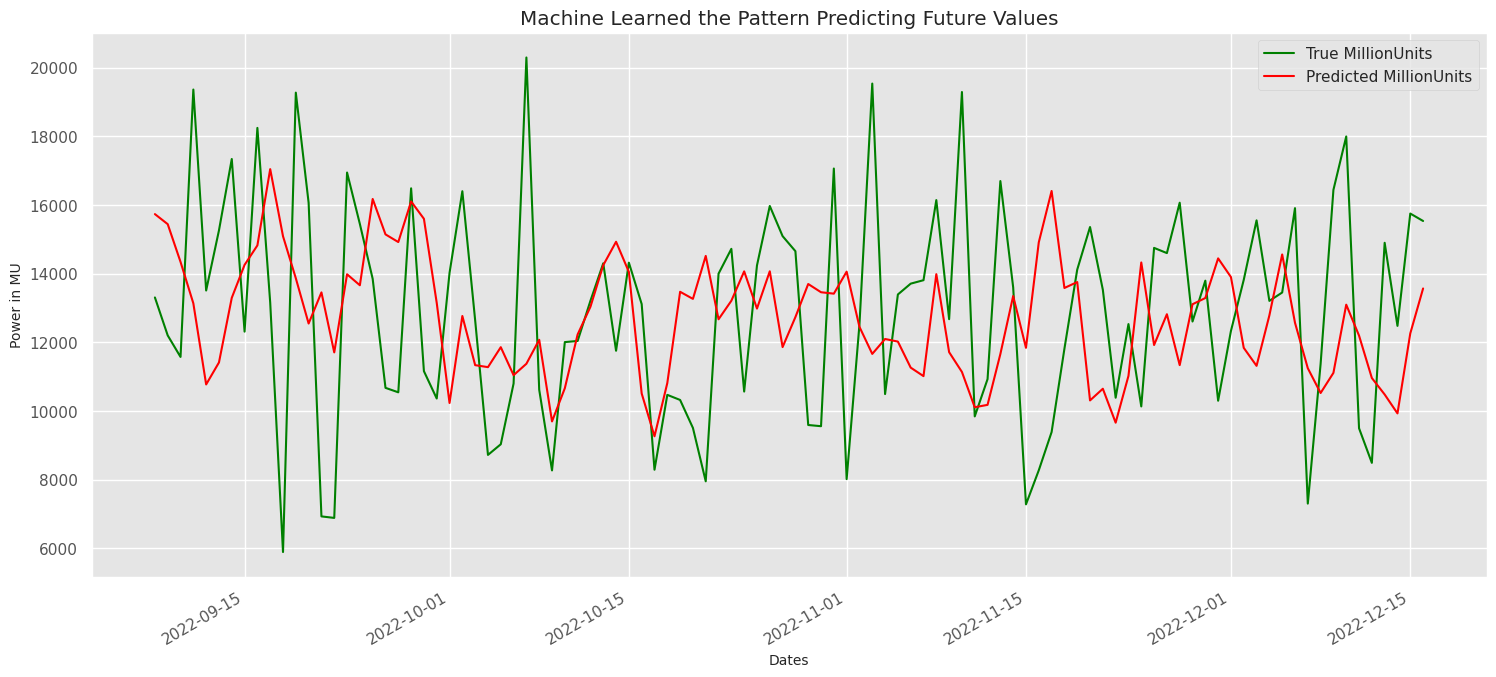

In [97]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

x = dates
y = True_MillionUnits
y1 = Predicted_MillionUnits

plt.plot(x, y, color="green", label="True MillionUnits")
plt.plot(x, y1, color="red", label="Predicted MillionUnits")

# Beautify the x-labels
plt.gcf().autofmt_xdate()

plt.xlabel('Dates')
plt.ylabel("Power in MU")
plt.title("Machine Learned the Pattern Predicting Future Values")

# Add legend
plt.legend()

plt.show()

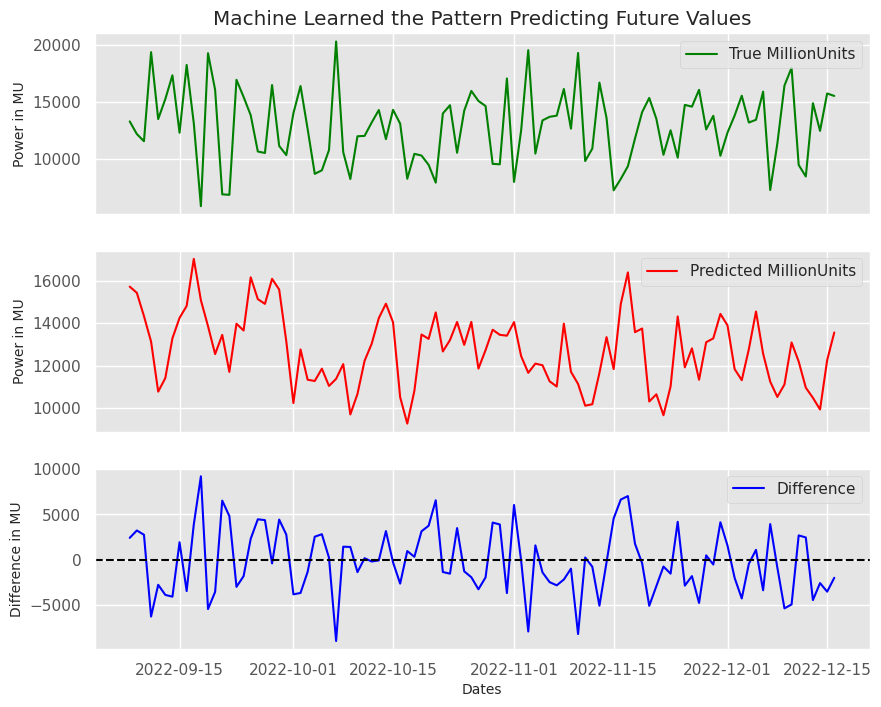

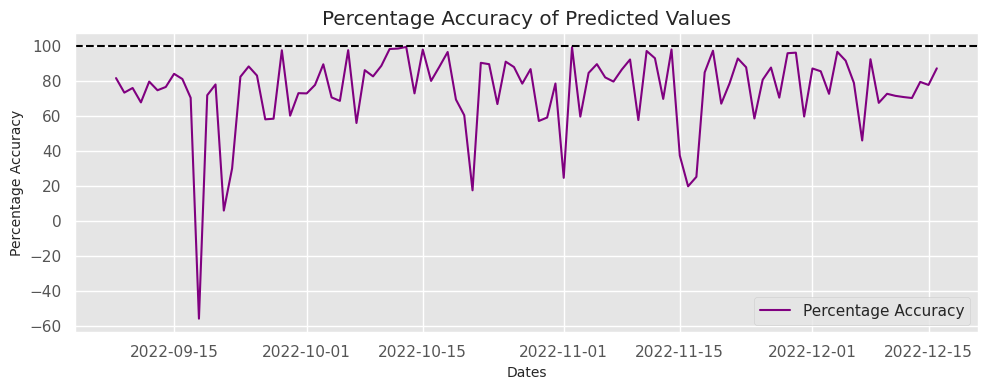

In [99]:
# True_MillionUnits = TestData["Total RE Generated (Energy Saved)"].to_list()
# Predicted_MillionUnits = [x[0] for x in Predicted_MillionUnits]
# dates = TestData.index.to_list()

# Calculate the difference between predicted and true values
difference = [predicted - true for predicted, true in zip(Predicted_MillionUnits, True_MillionUnits)]

# Calculate percentage accuracy
percentage_accuracy = [(1 - abs(d / t)) * 100 if t != 0 else 100 for d, t in zip(difference, True_MillionUnits)]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 8))

# Plot true values
ax1.plot(dates, True_MillionUnits, color="green", label="True MillionUnits")
ax1.set_ylabel("Power in MU")
ax1.set_title("Machine Learned the Pattern Predicting Future Values")
ax1.legend()

# Plot predicted values
ax2.plot(dates, Predicted_MillionUnits, color="red", label="Predicted MillionUnits")
ax2.set_ylabel("Power in MU")
ax2.legend()

# Plot difference
ax3.plot(dates, difference, color="blue", label="Difference")
ax3.set_xlabel('Dates')
ax3.set_ylabel("Difference in MU")
ax3.axhline(0, color="black", linestyle="--")  # Add a horizontal line at y=0
ax3.legend()

# Plot percentage accuracy
fig, ax4 = plt.subplots(figsize=(10, 4))
ax4.plot(dates, percentage_accuracy, color="purple", label="Percentage Accuracy")
ax4.set_xlabel('Dates')
ax4.set_ylabel("Percentage Accuracy")
ax4.set_title("Percentage Accuracy of Predicted Values")
ax4.axhline(100, color="black", linestyle="--")  # Add a horizontal line at y=100
ax4.legend()

plt.tight_layout()
plt.show()

# South India

In [102]:
df = pd.read_csv("Southern Region.csv")
print("="*50)
print("First Five Rows ","\n")
print(df.head(2),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

             Datetime Month  Year       Date  Consumption    Solar     Wind  \
0  2018-4-10 15:58:04   Apr  2018  Apr, 2018   25064.6144  1755.45  1165.94   
1  2018-5-26 11:59:40   May  2018  May, 2018   25064.6144  1840.76  1371.57   

   Others (Biomass, Bagasse, Small Hydel, Etc.)  \
0                                        277.47   
1                                        202.94   

   Total RE Generated (Energy Saved)  Cost Saved (IN Crores)  
0                            3198.86               166.34072  
1                            3415.27               177.59404   

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Datetime                                      57 non-null     object 
 1   Month                                

In [103]:
# Select only the two columns of interest
selected_columns = ['Datetime','Consumption', 'Total RE Generated (Energy Saved)']
dff = df[selected_columns]

# Print the resulting dataframe
# print(dff)

print("="*50)
print("First Five Rows ","\n")
print(dff.head(2),"\n")

print("="*50)
print("Information About Dataset","\n")
print(dff.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(dff.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(dff.isnull().sum(),"\n")

First Five Rows  

             Datetime  Consumption  Total RE Generated (Energy Saved)
0  2018-4-10 15:58:04   25064.6144                            3198.86
1  2018-5-26 11:59:40   25064.6144                            3415.27 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Datetime                           57 non-null     object 
 1   Consumption                        57 non-null     float64
 2   Total RE Generated (Energy Saved)  57 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB
None 

Describe the Dataset  

        Consumption  Total RE Generated (Energy Saved)
count     57.000000                          57.000000
mean   26737.841640                        5963.931579
std      807.954481                        1768.516309
min    25064.614

In [104]:
# Extract all Data Like Year MOnth Day Time etc
datasett = df
dataset = dff
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = dff.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)

/tmp/ipykernel_29540/2799729664.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
/tmp/ipykernel_29540/2799729664.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
/tmp/ipykernel_29540/2799729664.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,Consumption,Total RE Generated (Energy Saved),Month,Year,Date,Time,Week,Day
Datetime,,,,,,,,
2018-04-10 15:58:04,25064.6144,3198.86,4,2018,2018-04-10,15:58:04,15,Tuesday


In [105]:
dataset

,Consumption,Total RE Generated (Energy Saved),Month,Year,Date,Time,Week,Day
Datetime,,,,,,,,
2018-04-10 15:58:04,25064.61440,3198.86,4,2018,2018-04-10,15:58:04,15,Tuesday
2018-05-26 11:59:40,25064.61440,3415.27,5,2018,2018-05-26,11:59:40,21,Saturday
2018-06-15 08:03:27,25064.61440,5897.46,6,2018,2018-06-15,08:03:27,24,Friday
2018-07-11 03:53:53,25064.61440,8434.26,7,2018,2018-07-11,03:53:53,28,Wednesday
2018-08-13 19:56:01,25064.61440,9387.27,8,2018,2018-08-13,19:56:01,33,Monday
2018-09-05 11:48:03,25064.61440,6258.82,9,2018,2018-09-05,11:48:03,36,Wednesday
2018-10-05 02:46:35,25064.61440,4414.11,10,2018,2018-10-05,02:46:35,40,Friday
2018-11-18 04:38:12,25064.61440,3762.80,11,2018,2018-11-18,04:38:12,46,Sunday
2018-12-12 07:00:44,25064.61440,3778.92,12,2018,2018-12-12,07:00:44,50,Wednesday


In [106]:
# How many Unique Year do we Have in Dataset 
print(dff.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2018 2019 2020 2021 2022] 

Total Number of Unique Year 5 



In [107]:
## ValueError: cannot reindex on an axis with duplicate labels
dataset = dataset.loc[~dataset.index.duplicated()]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Energy Consumption According to Year')

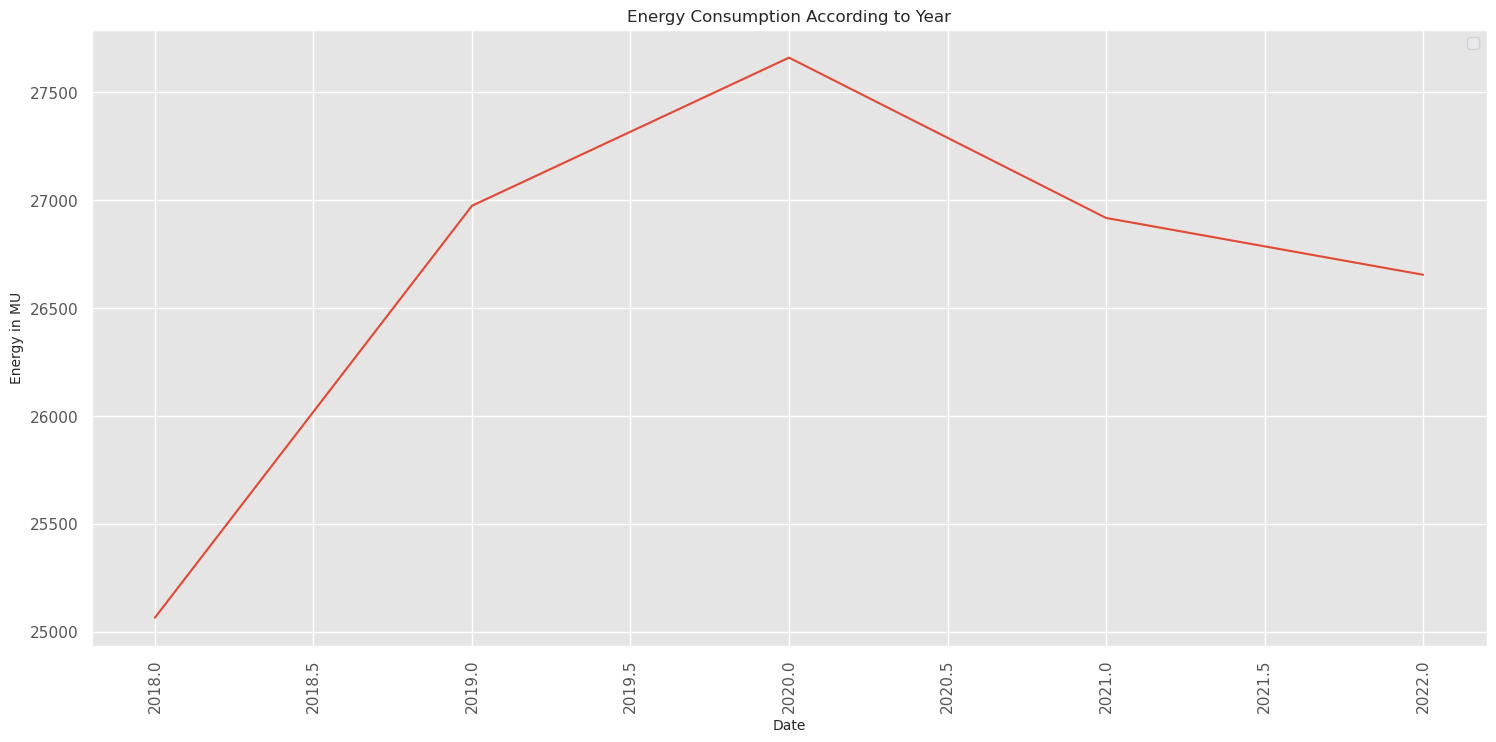

In [108]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["Consumption"], data=dff)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2018")
plt.xlabel("Date")
plt.ylabel("Energy in MU")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

/tmp/ipykernel_29540/3148789202.py:14: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_2018 = dataset["2018"]["Total RE Generated (Energy Saved)"].to_list()
/tmp/ipykernel_29540/3148789202.py:15: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  x_2018 = dataset["2018"]["Date"].to_list()
/tmp/ipykernel_29540/3148789202.py:19: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_2019 = dataset["2019"]["Total RE Generated (Energy Saved)"].to_list()
/tmp/ipykernel_29540/3148789202.py:20: FutureWarnin

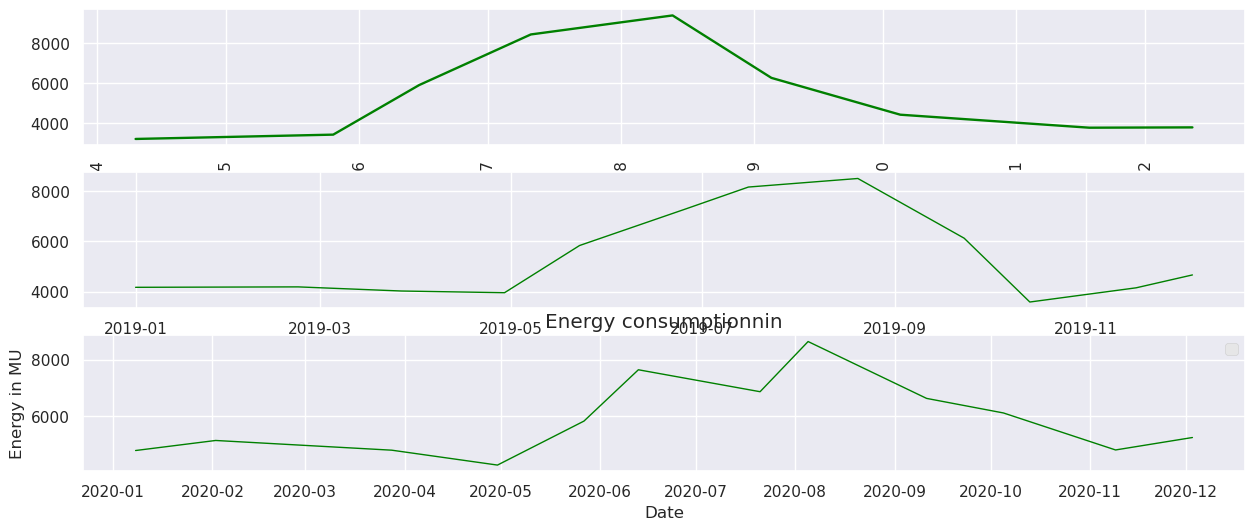

In [109]:
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)
# ax4= fig.add_subplot(313)
# ax5= fig.add_subplot(313)

style.use('ggplot')

y_2018 = dataset["2018"]["Total RE Generated (Energy Saved)"].to_list()
x_2018 = dataset["2018"]["Date"].to_list()
ax1.plot(x_2018,y_2018, color="green", linewidth=1.7)


y_2019 = dataset["2019"]["Total RE Generated (Energy Saved)"].to_list()
x_2019 = dataset["2019"]["Date"].to_list()
ax2.plot(x_2019, y_2019, color="green", linewidth=1)


y_2020 = dataset["2020"]["Total RE Generated (Energy Saved)"].to_list()
x_2020 = dataset["2020"]["Date"].to_list()
ax3.plot(x_2020, y_2020, color="green", linewidth=1)


# y_2021 = dataset["2021"]["Total RE Generated (Energy Saved)"].to_list()
# x_2021 = dataset["2021"]["Date"].to_list()
# ax4.plot(x_2021, y_2021, color="green", linewidth=1)


# y_2022 = dataset["2022"]["Total RE Generated (Energy Saved)"].to_list()
# x_2022 = dataset["2022"]["Date"].to_list()
# ax5.plot(x_2022, y_2022, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (18,8)
plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in MU")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_29540/1231461587.py:16: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_re = dataset[year]["Total RE Generated (Energy Saved)"].to_list()
/tmp/ipykernel_29540/1231461587.py:17: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  x_re = dataset[year]["Date"].to_list()
/tmp/ipykernel_29540/1231461587.py:19: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `fram

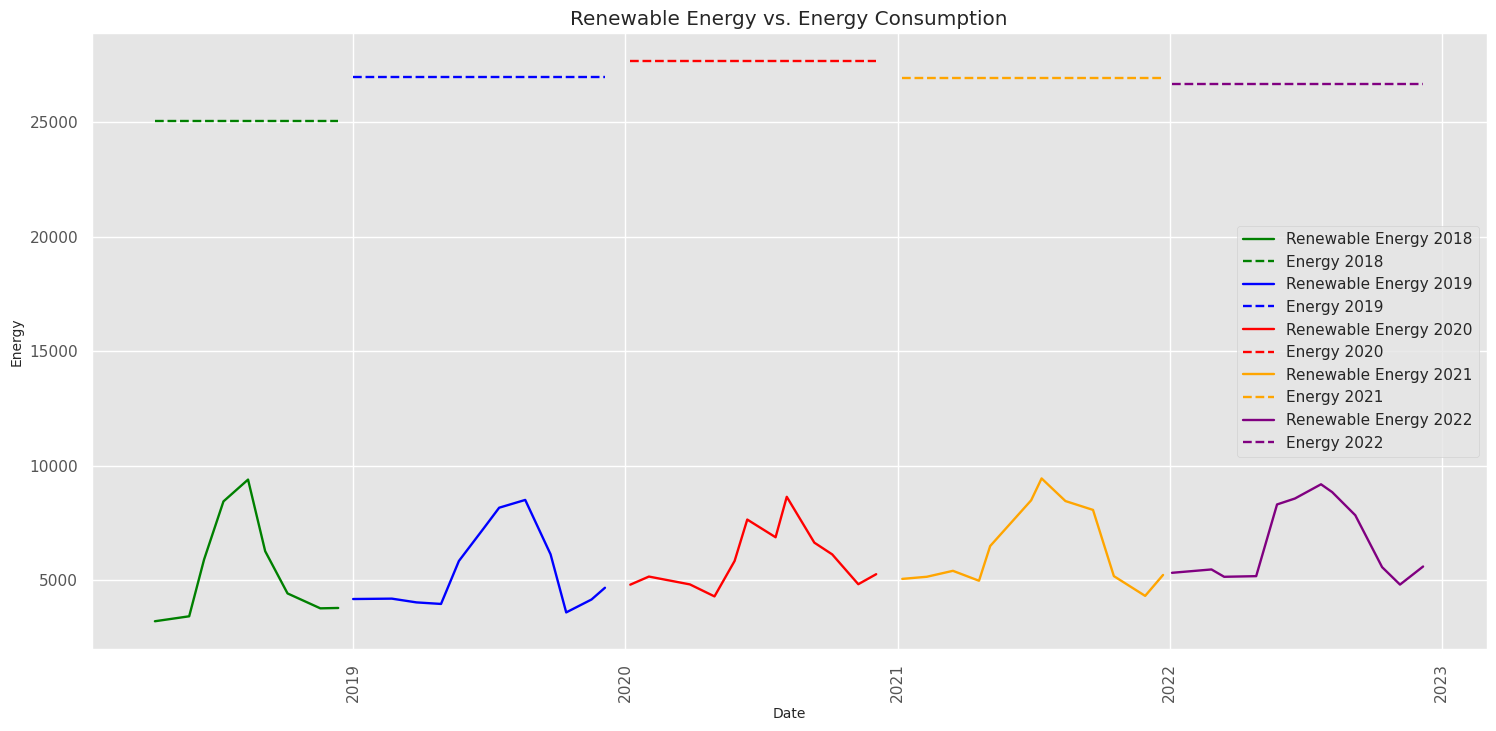

In [110]:
from matplotlib import style

style.use('ggplot')

years = ["2018", "2019", "2020", "2021", "2022"]
colors = ["green", "blue", "red", "orange", "purple"]

plt.xlabel("Date")
plt.ylabel("Energy")
plt.title("Renewable Energy vs. Energy Consumption")
plt.grid(True, alpha=1)
plt.xticks(rotation=90)
plt.legend()

for i, year in enumerate(years):
    y_re = dataset[year]["Total RE Generated (Energy Saved)"].to_list()
    x_re = dataset[year]["Date"].to_list()

    y_consumption = dataset[year]["Consumption"].to_list()
    x_consumption = dataset[year]["Date"].to_list()

    plt.plot(x_re, y_re, color=colors[i], linewidth=1.7, label=f"Renewable Energy {year}")
    plt.plot(x_consumption, y_consumption, color=colors[i], linewidth=1.7, linestyle="--", label=f"Energy {year}")

plt.rcParams["figure.figsize"] = (18, 8)
plt.legend()
plt.show()


## Energy Distribution

/tmp/ipykernel_29540/1842333175.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Consumption"])


Text(0.5, 1.0, 'Consumption Energy Distribution [MU]')

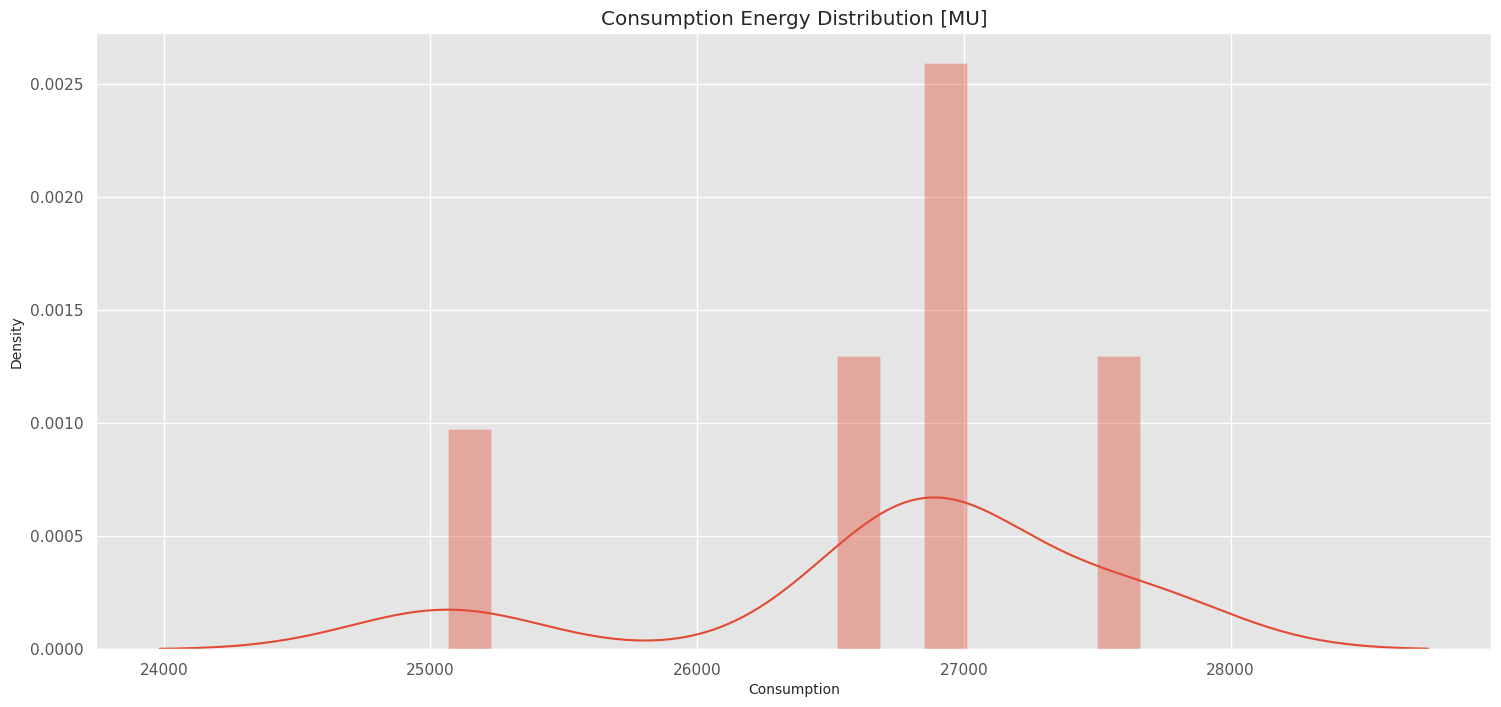

In [111]:
sns.distplot(dataset["Consumption"])
plt.title("Consumption Energy Distribution [MU]")

/tmp/ipykernel_29540/4102279045.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Total RE Generated (Energy Saved)"])


Text(0.5, 1.0, 'Renewable Energy Distribution [MU]')

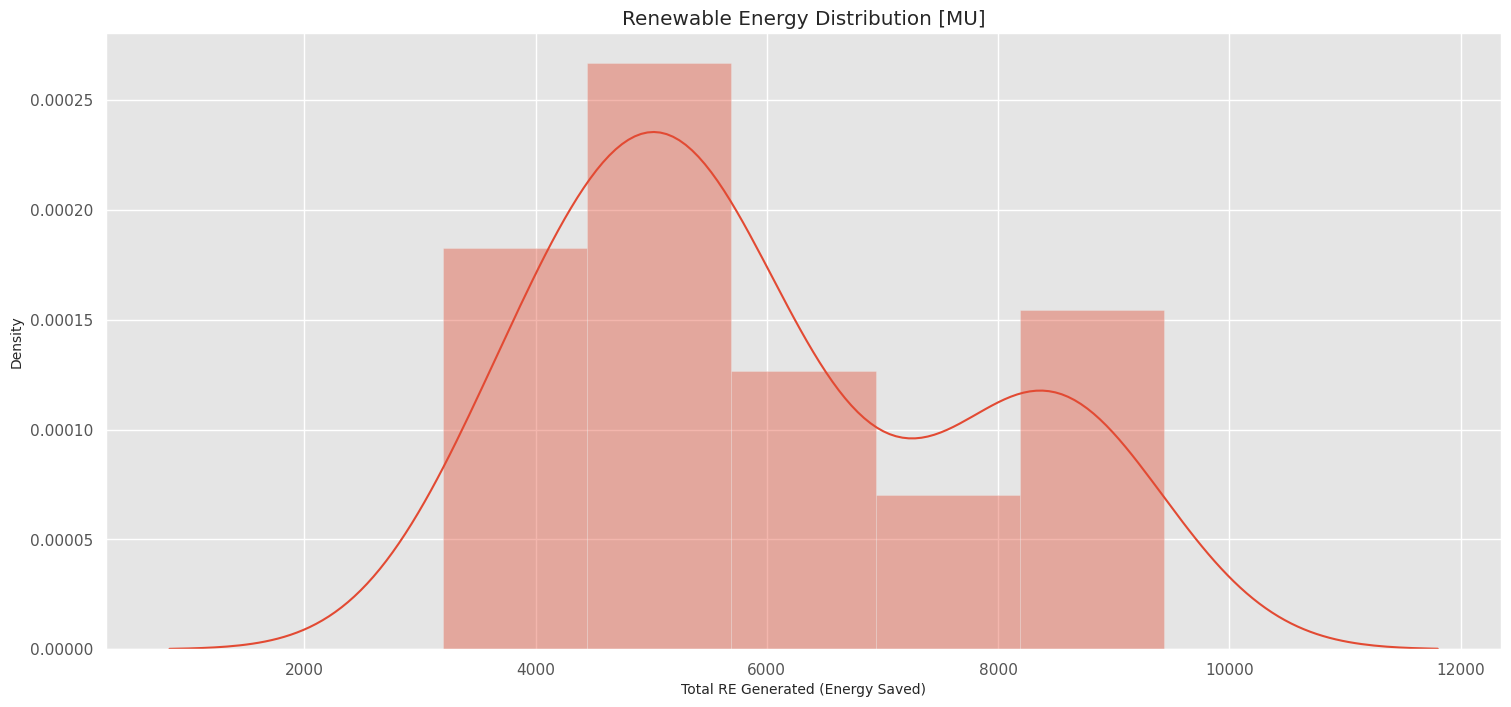

In [112]:
sns.distplot(dataset["Total RE Generated (Energy Saved)"])
plt.title("Renewable Energy Distribution [MU]")

## Energy with Respect to Time

In [113]:
# df
# dataset
dataset['Time'] = pd.to_datetime(dataset['Time'], format='%H:%M:%S')
# dataset

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


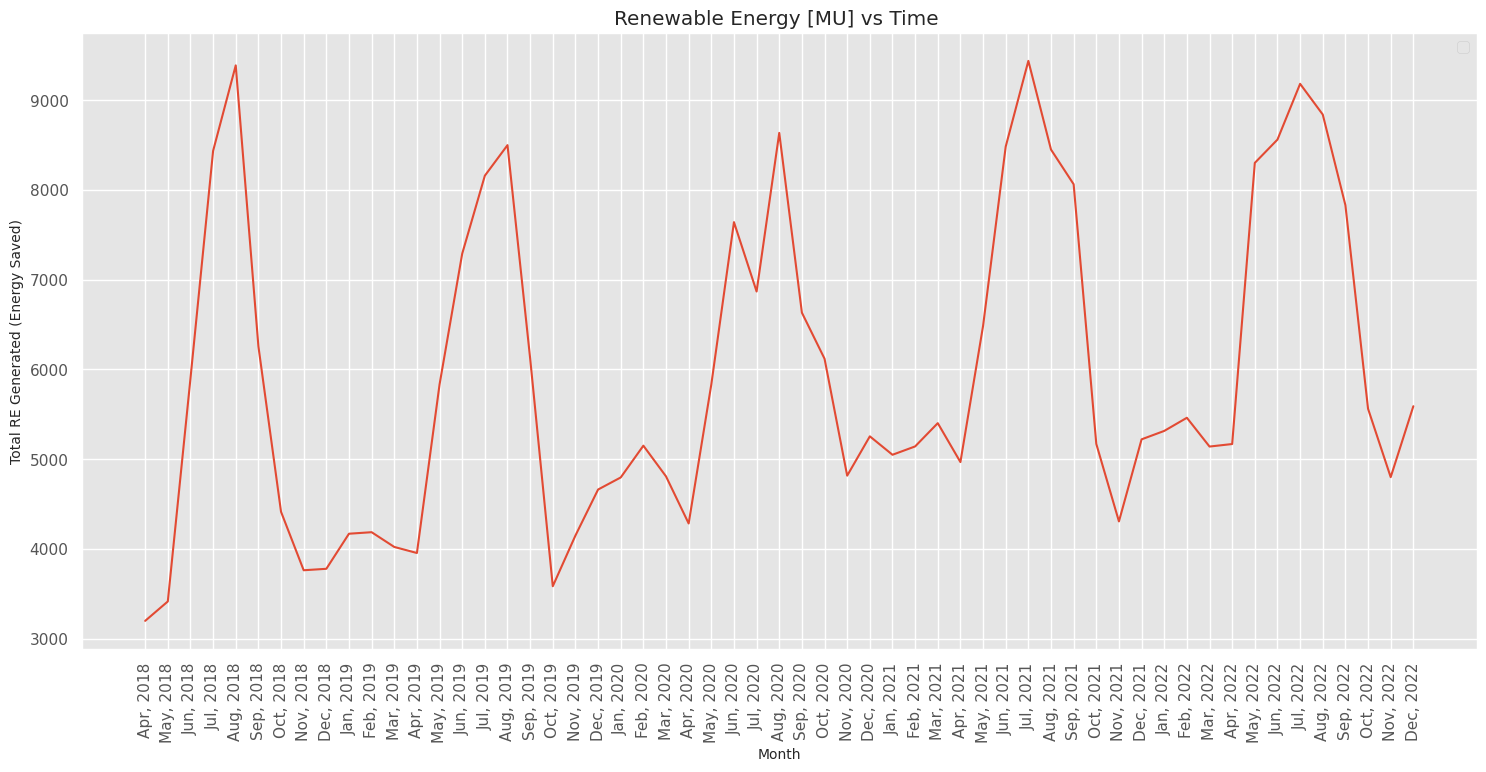

In [114]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=datasett["Date"],y=datasett["Total RE Generated (Energy Saved)"], data=df)
# plt.plot(dataset["Time"], dataset["Consumption"])
plt.title("Renewable Energy [MU] vs Time ")
plt.xlabel("Month")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


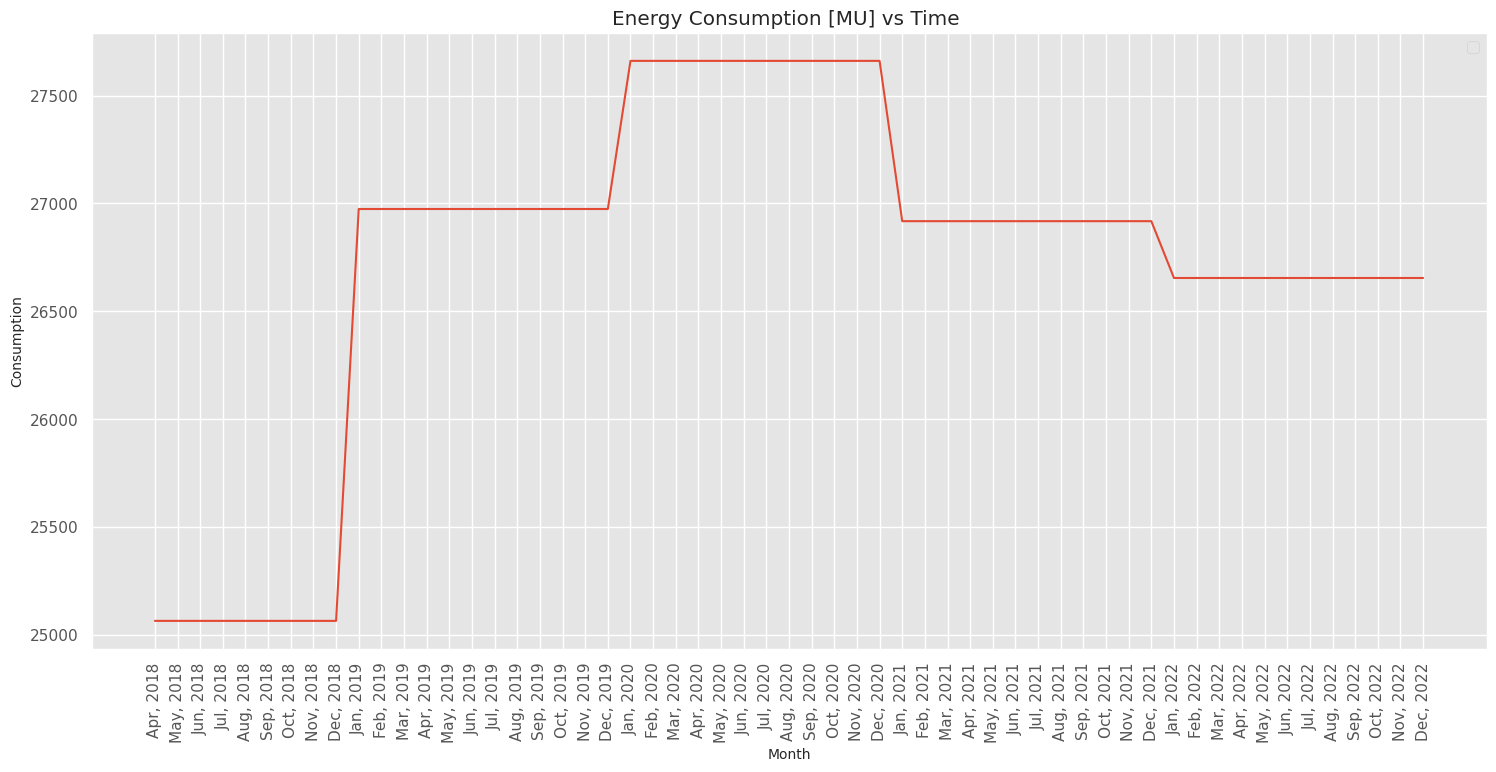

In [115]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=datasett["Date"],y=datasett["Consumption"], data=df)
# plt.plot(dataset["Time"], dataset["Consumption"])
plt.title("Energy Consumption [MU] vs Time ")
plt.xlabel("Month")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

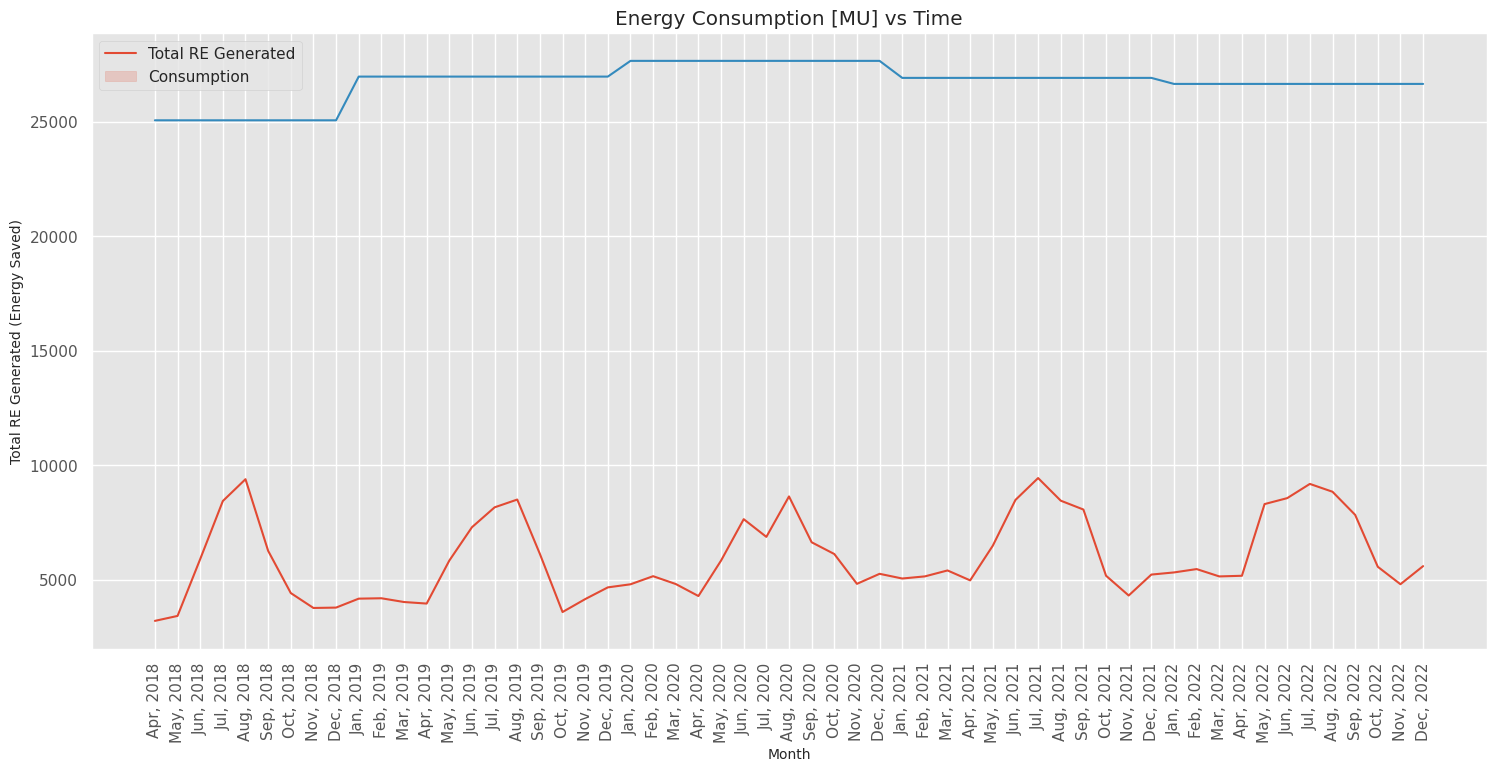

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
ax1 = fig.add_subplot(111)

sns.lineplot(x=datasett["Date"], y=datasett["Total RE Generated (Energy Saved)"], data=df, ax=ax1)
sns.lineplot(x=datasett["Date"], y=datasett["Consumption"], data=df, ax=ax1)

plt.title("Energy Consumption [MU] vs Time")
plt.xlabel("Month")
plt.grid(True, alpha=1)
plt.legend(["Total RE Generated", "Consumption"])

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

plt.show()


## Resampleing Data
Consumption only

In [146]:
NewDataSet = dataset.resample('D').mean()

/tmp/ipykernel_29540/2859532632.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  NewDataSet = dataset.resample('D').mean()


In [147]:
NewDataSet

,Consumption,Total RE Generated (Energy Saved),Month,Year,Week
Datetime,,,,,
2018-04-10,25064.61440,3198.86,4.0,2018.0,15.0
2018-04-11,NaN,NaN,NaN,NaN,NaN
2018-04-12,NaN,NaN,NaN,NaN,NaN
2018-04-13,NaN,NaN,NaN,NaN,NaN
2018-04-14,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-12-03,NaN,NaN,NaN,NaN,NaN
2022-12-04,NaN,NaN,NaN,NaN,NaN
2022-12-05,NaN,NaN,NaN,NaN,NaN


In [148]:
# Load the dataframe
# df = pd.read_csv('your_data.csv')
df = NewDataSet
# Convert the 'Datetime' column to datetime format
# df['Datetime'] = pd.to_datetime(df['Datetime'])

# Sort the dataframe by the 'Datetime' column
df = df.sort_values('Datetime')

# Forward fill the NaN values in the 'Month', 'Year', and 'Week' columns
df['Month'] = df['Month'].fillna(method='ffill')
df['Year'] = df['Year'].fillna(method='ffill')
df['Week'] = df['Week'].fillna(method='ffill')

# Print the updated dataframe
NewDataSet = df


In [149]:
NewDataSet

,Consumption,Total RE Generated (Energy Saved),Month,Year,Week
Datetime,,,,,
2018-04-10,25064.61440,3198.86,4.0,2018.0,15.0
2018-04-11,NaN,NaN,4.0,2018.0,15.0
2018-04-12,NaN,NaN,4.0,2018.0,15.0
2018-04-13,NaN,NaN,4.0,2018.0,15.0
2018-04-14,NaN,NaN,4.0,2018.0,15.0
...,...,...,...,...,...
2022-12-03,NaN,NaN,11.0,2022.0,44.0
2022-12-04,NaN,NaN,11.0,2022.0,44.0
2022-12-05,NaN,NaN,11.0,2022.0,44.0


In [150]:
df=NewDataSet

In [151]:
import numpy as np
import pandas as pd

# Calculate the mean and standard deviation of the electricity consumption column
mean = df['Consumption'].mean()
std = df['Consumption'].std()

# Set the range for random values (e.g., within 1 standard deviation of the mean)
lower_limit = mean - std
upper_limit = mean + std

# Generate random values within the specified range
random_values = np.random.uniform(lower_limit, upper_limit, df['Consumption'].isnull().sum())

# Replace NaN values with the generated random values
df.loc[df['Consumption'].isnull(), 'Consumption'] = random_values

# Print the updated DataFrame
df

,Consumption,Total RE Generated (Energy Saved),Month,Year,Week
Datetime,,,,,
2018-04-10,25064.614400,3198.86,4.0,2018.0,15.0
2018-04-11,26021.761684,NaN,4.0,2018.0,15.0
2018-04-12,26471.021949,NaN,4.0,2018.0,15.0
2018-04-13,26045.980350,NaN,4.0,2018.0,15.0
2018-04-14,26631.299453,NaN,4.0,2018.0,15.0
...,...,...,...,...,...
2022-12-03,26948.912211,NaN,11.0,2022.0,44.0
2022-12-04,27221.406222,NaN,11.0,2022.0,44.0
2022-12-05,27199.578788,NaN,11.0,2022.0,44.0


In [152]:
df.shape
NewDataSet = df

In [153]:
print("Old Dataset ",dataset.shape)
print("New  Dataset ",NewDataSet.shape)

Old Dataset  (57, 8)
New  Dataset  (1703, 5)


In [154]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [155]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (1643, 1)
Test Set Shape  (100, 5)


In [156]:
Training_Set

,Consumption
Datetime,
2018-04-10,25064.614400
2018-04-11,26021.761684
2018-04-12,26471.021949
2018-04-13,26045.980350
2018-04-14,26631.299453
...,...
2022-10-04,26507.446273
2022-10-05,26250.528937
2022-10-06,27458.731069


In [157]:
TestData

,Consumption,Total RE Generated (Energy Saved),Month,Year,Week
Datetime,,,,,
2022-08-30,26600.644435,NaN,8.0,2022.0,31.0
2022-08-31,25993.759408,NaN,8.0,2022.0,31.0
2022-09-01,26062.849902,NaN,8.0,2022.0,31.0
2022-09-02,27000.274554,NaN,8.0,2022.0,31.0
2022-09-03,26796.031712,NaN,8.0,2022.0,31.0
...,...,...,...,...,...
2022-12-03,26948.912211,NaN,11.0,2022.0,44.0
2022-12-04,27221.406222,NaN,11.0,2022.0,44.0
2022-12-05,27199.578788,NaN,11.0,2022.0,44.0


In [158]:
from sklearn.preprocessing import MinMaxScaler

In [159]:
Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [160]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(1583, 60, 1)
(1583, 1)


In [161]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(1583, 60, 1)

## Model

In [162]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

2023-06-01 20:49:31.685446: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-01 20:49:31.687272: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-01 20:49:31.688578: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [163]:
regressor.fit(X_Train, Y_Train, epochs = 1000, batch_size = 64)

Epoch 1/1000


2023-06-01 20:49:32.624051: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-01 20:49:32.625913: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-01 20:49:32.627197: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

25/25 [==============================] - 12s 96ms/step - loss: 0.0998
Epoch 2/1000
25/25 [==============================] - 2s 93ms/step - loss: 0.0393
Epoch 3/1000
25/25 [==============================] - 2s 96ms/step - loss: 0.0391
Epoch 4/1000
25/25 [==============================] - 2s 96ms/step - loss: 0.0370
Epoch 5/1000
25/25 [==============================] - 2s 98ms/step - loss: 0.0373
Epoch 6/1000
25/25 [==============================] - 2s 98ms/step - loss: 0.0369
Epoch 7/1000
25/25 [==============================] - 2s 98ms/step - loss: 0.0378
Epoch 8/1000
25/25 [==============================] - 2s 99ms/step - loss: 0.0380
Epoch 9/1000
25/25 [==============================] - 2s 98ms/step - loss: 0.0390
Epoch 10/1000
25/25 [==============================] - 3s 100ms/step - loss: 0.0369
Epoch 11/1000
25/25 [==============================] - 2s 99ms/step - loss: 0.0364
Epoch 12/1000
25/25 [==============================] - 2s 96ms/step - loss: 0.0382
Epoch 13/1000
25/25 [===

25/25 [==============================] - 2s 97ms/step - loss: 0.0355
Epoch 100/1000
25/25 [==============================] - 2s 99ms/step - loss: 0.0346
Epoch 101/1000
25/25 [==============================] - 2s 98ms/step - loss: 0.0351
Epoch 102/1000
25/25 [==============================] - 3s 102ms/step - loss: 0.0349
Epoch 103/1000
25/25 [==============================] - 2s 98ms/step - loss: 0.0349
Epoch 104/1000
25/25 [==============================] - 2s 97ms/step - loss: 0.0351
Epoch 105/1000
25/25 [==============================] - 2s 99ms/step - loss: 0.0349
Epoch 106/1000
25/25 [==============================] - 2s 97ms/step - loss: 0.0348
Epoch 107/1000
25/25 [==============================] - 2s 97ms/step - loss: 0.0348
Epoch 108/1000
25/25 [==============================] - 2s 97ms/step - loss: 0.0346
Epoch 109/1000
25/25 [==============================] - 2s 99ms/step - loss: 0.0348
Epoch 110/1000
25/25 [==============================] - 2s 100ms/step - loss: 0.0346
Epoch

25/25 [==============================] - 4s 144ms/step - loss: 0.0342
Epoch 196/1000
25/25 [==============================] - 4s 154ms/step - loss: 0.0343
Epoch 197/1000
25/25 [==============================] - 3s 140ms/step - loss: 0.0340
Epoch 198/1000
25/25 [==============================] - 4s 140ms/step - loss: 0.0344
Epoch 199/1000
25/25 [==============================] - 4s 140ms/step - loss: 0.0343
Epoch 200/1000
25/25 [==============================] - 4s 141ms/step - loss: 0.0341
Epoch 201/1000
25/25 [==============================] - 4s 144ms/step - loss: 0.0340
Epoch 202/1000
25/25 [==============================] - 4s 142ms/step - loss: 0.0341
Epoch 203/1000
25/25 [==============================] - 4s 140ms/step - loss: 0.0340
Epoch 204/1000
25/25 [==============================] - 4s 140ms/step - loss: 0.0345
Epoch 205/1000
25/25 [==============================] - 4s 140ms/step - loss: 0.0344
Epoch 206/1000
25/25 [==============================] - 4s 152ms/step - loss: 0.

25/25 [==============================] - 4s 159ms/step - loss: 0.0339
Epoch 292/1000
25/25 [==============================] - 4s 150ms/step - loss: 0.0340
Epoch 293/1000
25/25 [==============================] - 3s 138ms/step - loss: 0.0337
Epoch 294/1000
25/25 [==============================] - 4s 147ms/step - loss: 0.0340
Epoch 295/1000
25/25 [==============================] - 4s 143ms/step - loss: 0.0337
Epoch 296/1000
25/25 [==============================] - 4s 149ms/step - loss: 0.0340
Epoch 297/1000
25/25 [==============================] - 4s 174ms/step - loss: 0.0339
Epoch 298/1000
25/25 [==============================] - 4s 154ms/step - loss: 0.0340
Epoch 299/1000
25/25 [==============================] - 4s 163ms/step - loss: 0.0340
Epoch 300/1000
25/25 [==============================] - 4s 149ms/step - loss: 0.0337
Epoch 301/1000
25/25 [==============================] - 4s 153ms/step - loss: 0.0339
Epoch 302/1000
25/25 [==============================] - 4s 153ms/step - loss: 0.

25/25 [==============================] - 3s 137ms/step - loss: 0.0334
Epoch 388/1000
25/25 [==============================] - 3s 138ms/step - loss: 0.0338
Epoch 389/1000
25/25 [==============================] - 4s 141ms/step - loss: 0.0335
Epoch 390/1000
25/25 [==============================] - 4s 141ms/step - loss: 0.0333
Epoch 391/1000
25/25 [==============================] - 3s 138ms/step - loss: 0.0332
Epoch 392/1000
25/25 [==============================] - 3s 137ms/step - loss: 0.0334
Epoch 393/1000
25/25 [==============================] - 4s 141ms/step - loss: 0.0335
Epoch 394/1000
25/25 [==============================] - 3s 136ms/step - loss: 0.0333
Epoch 395/1000
25/25 [==============================] - 3s 138ms/step - loss: 0.0332
Epoch 396/1000
25/25 [==============================] - 4s 140ms/step - loss: 0.0332
Epoch 397/1000
25/25 [==============================] - 3s 139ms/step - loss: 0.0332
Epoch 398/1000
25/25 [==============================] - 3s 139ms/step - loss: 0.

25/25 [==============================] - 4s 149ms/step - loss: 0.0318
Epoch 484/1000
25/25 [==============================] - 4s 153ms/step - loss: 0.0313
Epoch 485/1000
25/25 [==============================] - 4s 154ms/step - loss: 0.0311
Epoch 486/1000
25/25 [==============================] - 3s 138ms/step - loss: 0.0321
Epoch 487/1000
25/25 [==============================] - 4s 141ms/step - loss: 0.0329
Epoch 488/1000
25/25 [==============================] - 4s 156ms/step - loss: 0.0331
Epoch 489/1000
25/25 [==============================] - 4s 150ms/step - loss: 0.0324
Epoch 490/1000
25/25 [==============================] - 4s 164ms/step - loss: 0.0318
Epoch 491/1000
25/25 [==============================] - 4s 153ms/step - loss: 0.0311
Epoch 492/1000
25/25 [==============================] - 4s 150ms/step - loss: 0.0312
Epoch 493/1000
25/25 [==============================] - 4s 150ms/step - loss: 0.0313
Epoch 494/1000
25/25 [==============================] - 4s 147ms/step - loss: 0.

25/25 [==============================] - 4s 156ms/step - loss: 0.0267
Epoch 580/1000
25/25 [==============================] - 4s 155ms/step - loss: 0.0273
Epoch 581/1000
25/25 [==============================] - 4s 147ms/step - loss: 0.0269
Epoch 582/1000
25/25 [==============================] - 4s 151ms/step - loss: 0.0266
Epoch 583/1000
25/25 [==============================] - 4s 153ms/step - loss: 0.0260
Epoch 584/1000
25/25 [==============================] - 4s 150ms/step - loss: 0.0259
Epoch 585/1000
25/25 [==============================] - 4s 155ms/step - loss: 0.0256
Epoch 586/1000
25/25 [==============================] - 4s 148ms/step - loss: 0.0264
Epoch 587/1000
25/25 [==============================] - 4s 150ms/step - loss: 0.0269
Epoch 588/1000
25/25 [==============================] - 4s 159ms/step - loss: 0.0265
Epoch 589/1000
25/25 [==============================] - 4s 144ms/step - loss: 0.0258
Epoch 590/1000
25/25 [==============================] - 4s 152ms/step - loss: 0.

25/25 [==============================] - 4s 152ms/step - loss: 0.0201
Epoch 676/1000
25/25 [==============================] - 4s 150ms/step - loss: 0.0188
Epoch 677/1000
25/25 [==============================] - 4s 161ms/step - loss: 0.0185
Epoch 678/1000
25/25 [==============================] - 4s 152ms/step - loss: 0.0194
Epoch 679/1000
25/25 [==============================] - 4s 143ms/step - loss: 0.0185
Epoch 680/1000
25/25 [==============================] - 4s 147ms/step - loss: 0.0189
Epoch 681/1000
25/25 [==============================] - 4s 175ms/step - loss: 0.0187
Epoch 682/1000
25/25 [==============================] - 4s 158ms/step - loss: 0.0188
Epoch 683/1000
25/25 [==============================] - 4s 149ms/step - loss: 0.0191
Epoch 684/1000
25/25 [==============================] - 4s 155ms/step - loss: 0.0189
Epoch 685/1000
25/25 [==============================] - 4s 154ms/step - loss: 0.0190
Epoch 686/1000
25/25 [==============================] - 4s 151ms/step - loss: 0.

25/25 [==============================] - 4s 144ms/step - loss: 0.0133
Epoch 772/1000
25/25 [==============================] - 4s 145ms/step - loss: 0.0130
Epoch 773/1000
25/25 [==============================] - 4s 144ms/step - loss: 0.0122
Epoch 774/1000
25/25 [==============================] - 4s 147ms/step - loss: 0.0136
Epoch 775/1000
25/25 [==============================] - 4s 143ms/step - loss: 0.0140
Epoch 776/1000
25/25 [==============================] - 4s 141ms/step - loss: 0.0133
Epoch 777/1000
25/25 [==============================] - 4s 151ms/step - loss: 0.0124
Epoch 778/1000
25/25 [==============================] - 4s 144ms/step - loss: 0.0130
Epoch 779/1000
25/25 [==============================] - 4s 140ms/step - loss: 0.0127
Epoch 780/1000
25/25 [==============================] - 4s 143ms/step - loss: 0.0137
Epoch 781/1000
25/25 [==============================] - 4s 146ms/step - loss: 0.0125
Epoch 782/1000
25/25 [==============================] - 4s 145ms/step - loss: 0.

25/25 [==============================] - 4s 146ms/step - loss: 0.0104
Epoch 868/1000
25/25 [==============================] - 4s 151ms/step - loss: 0.0092
Epoch 869/1000
25/25 [==============================] - 4s 157ms/step - loss: 0.0097
Epoch 870/1000
25/25 [==============================] - 4s 153ms/step - loss: 0.0098
Epoch 871/1000
25/25 [==============================] - 4s 161ms/step - loss: 0.0105
Epoch 872/1000
25/25 [==============================] - 4s 166ms/step - loss: 0.0101
Epoch 873/1000
25/25 [==============================] - 4s 154ms/step - loss: 0.0097
Epoch 874/1000
25/25 [==============================] - 4s 162ms/step - loss: 0.0104
Epoch 875/1000
25/25 [==============================] - 4s 170ms/step - loss: 0.0098
Epoch 876/1000
25/25 [==============================] - 4s 169ms/step - loss: 0.0086
Epoch 877/1000
25/25 [==============================] - 4s 144ms/step - loss: 0.0082
Epoch 878/1000
25/25 [==============================] - 4s 161ms/step - loss: 0.

25/25 [==============================] - 3s 137ms/step - loss: 0.0078
Epoch 964/1000
25/25 [==============================] - 4s 163ms/step - loss: 0.0069
Epoch 965/1000
25/25 [==============================] - 4s 147ms/step - loss: 0.0070
Epoch 966/1000
25/25 [==============================] - 4s 156ms/step - loss: 0.0069
Epoch 967/1000
25/25 [==============================] - 4s 157ms/step - loss: 0.0072
Epoch 968/1000
25/25 [==============================] - 3s 140ms/step - loss: 0.0076
Epoch 969/1000
25/25 [==============================] - 3s 140ms/step - loss: 0.0072
Epoch 970/1000
25/25 [==============================] - 4s 145ms/step - loss: 0.0065
Epoch 971/1000
25/25 [==============================] - 4s 141ms/step - loss: 0.0065
Epoch 972/1000
25/25 [==============================] - 4s 170ms/step - loss: 0.0058
Epoch 973/1000
25/25 [==============================] - 4s 158ms/step - loss: 0.0073
Epoch 974/1000
25/25 [==============================] - 4s 161ms/step - loss: 0.

## TestData

In [179]:
TestData.head(2)

,Consumption,Total RE Generated (Energy Saved),Month,Year,Week
Datetime,,,,,
2022-08-30,26600.644435,NaN,8.0,2022.0,31.0
2022-08-31,25993.759408,NaN,8.0,2022.0,31.0


In [180]:
TestData.shape

(100, 5)

In [181]:
NewDataSet.shape

(1703, 5)

In [182]:
Df_Total = pd.concat((NewDataSet[["Consumption"]], TestData[["Consumption"]]), axis=0)

In [183]:
Df_Total.fillna(0, inplace=True)

In [184]:
Df_Total

,Consumption
Datetime,
2018-04-10,25064.614400
2018-04-11,26021.761684
2018-04-12,26471.021949
2018-04-13,26045.980350
2018-04-14,26631.299453
...,...
2022-12-03,26948.912211
2022-12-04,27221.406222
2022-12-05,27199.578788


In [185]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [186]:
inputs

array([[27204.71692337],
       [26835.41860838],
       [26516.84620481],
       [26371.13823046],
       [26654.18028   ],
       [26779.80013499],
       [27187.95724235],
       [26621.0309715 ],
       [27208.30576097],
       [26921.87285838],
       [25998.21765351],
       [26275.53855611],
       [27081.92607272],
       [26459.33087949],
       [26254.99015955],
       [27179.67673222],
       [26025.22548659],
       [26615.66399887],
       [26282.15294793],
       [27328.06284719],
       [26844.02826887],
       [27286.24347243],
       [27354.56398533],
       [27404.08661391],
       [26498.95887409],
       [27001.61425087],
       [27044.3833443 ],
       [26793.66435167],
       [26654.18028   ],
       [26620.52689965],
       [27255.78998801],
       [27452.62472802],
       [26801.74516361],
       [26712.53528001],
       [26916.66716445],
       [26918.94887864],
       [27509.57163035],
       [26088.05627406],
       [26958.29477906],
       [26891.17105867],


In [187]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_stock_price = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

4/4 [==============================] - 0s 36ms/step


In [188]:
True_MillionUnits = TestData["Consumption"].to_list()
Predicted_MillionUnits  = predicted_stock_price
dates = TestData.index.to_list()

In [189]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMillionUnits": True_MillionUnits,
    "PredictedMillionUnits":[x[0] for x in Predicted_MillionUnits ]
})

## Future Prediction

In [190]:
Machine_Df

,Date,TrueMillionUnits,PredictedMillionUnits
0,2022-08-30,26600.644435,27145.626953
1,2022-08-31,25993.759408,27233.128906
2,2022-09-01,26062.849902,27436.123047
3,2022-09-02,27000.274554,27004.593750
4,2022-09-03,26796.031712,26488.685547
...,...,...,...
95,2022-12-03,26948.912211,26256.318359
96,2022-12-04,27221.406222,26498.769531
97,2022-12-05,27199.578788,26607.501953
98,2022-12-06,26516.518950,26445.794922


In [191]:
True_MillionUnits = TestData["Consumption"].to_list()
Predicted_MillionUnits  = [x[0] for x in Predicted_MillionUnits ]
dates = TestData.index.to_list()

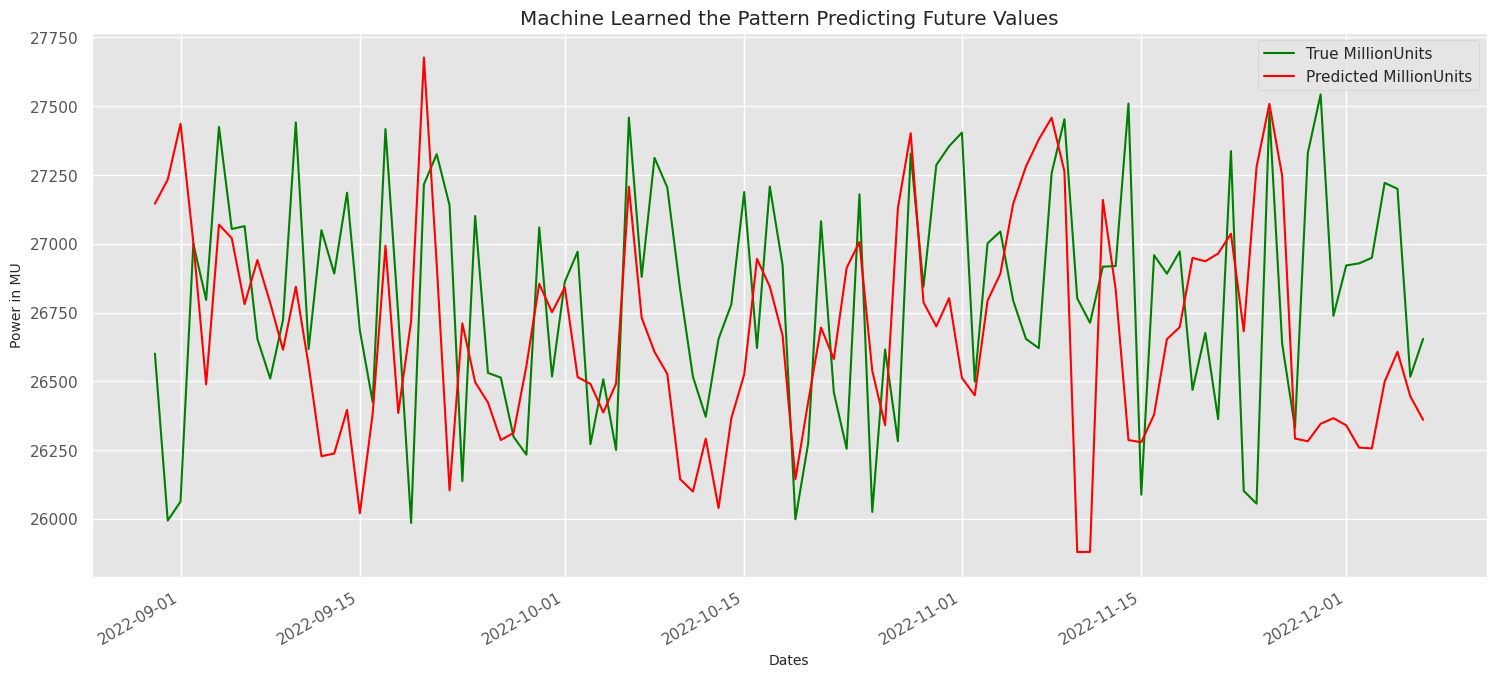

In [192]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

x = dates
y = True_MillionUnits
y1 = Predicted_MillionUnits

plt.plot(x, y, color="green", label="True MillionUnits")
plt.plot(x, y1, color="red", label="Predicted MillionUnits")

# Beautify the x-labels
plt.gcf().autofmt_xdate()

plt.xlabel('Dates')
plt.ylabel("Power in MU")
plt.title("Machine Learned the Pattern Predicting Future Values")

# Add legend
plt.legend()

plt.show()


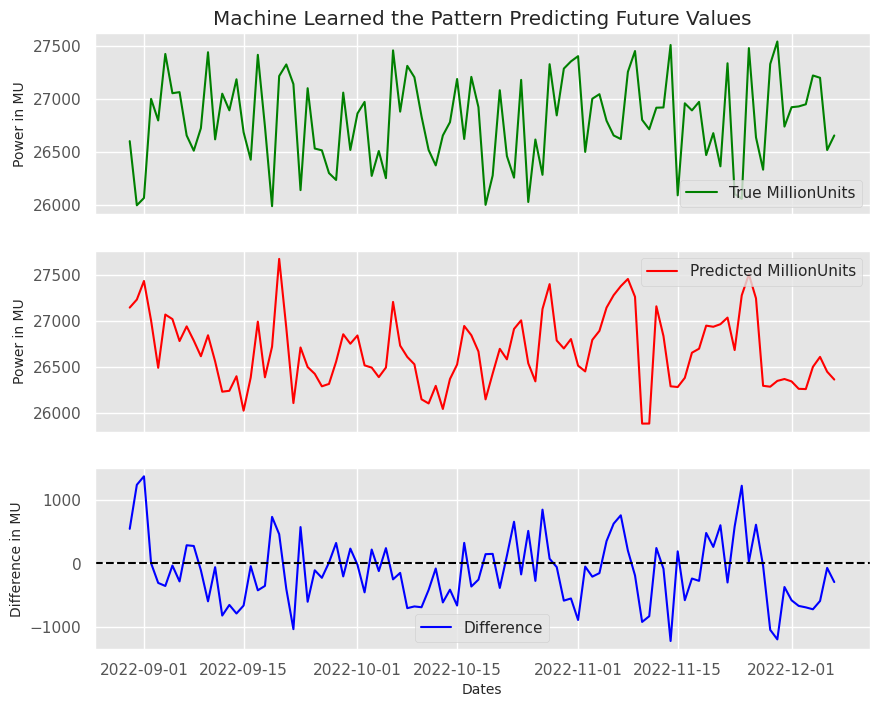

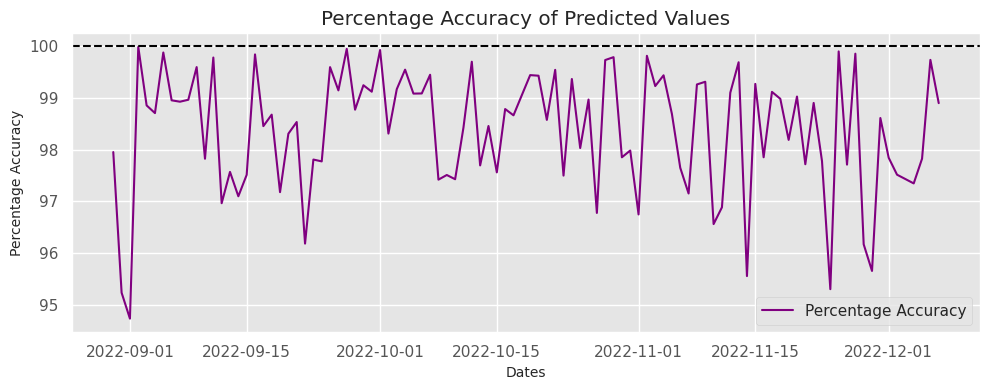

In [193]:
# True_MillionUnits = TestData["Consumption"].to_list()
# Predicted_MillionUnits = [x[0] for x in Predicted_MillionUnits]
# dates = TestData.index.to_list()

# Calculate the difference between predicted and true values
difference = [predicted - true for predicted, true in zip(Predicted_MillionUnits, True_MillionUnits)]

# Calculate percentage accuracy
percentage_accuracy = [(1 - abs(d / t)) * 100 if t != 0 else 100 for d, t in zip(difference, True_MillionUnits)]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 8))

# Plot true values
ax1.plot(dates, True_MillionUnits, color="green", label="True MillionUnits")
ax1.set_ylabel("Power in MU")
ax1.set_title("Machine Learned the Pattern Predicting Future Values")
ax1.legend()

# Plot predicted values
ax2.plot(dates, Predicted_MillionUnits, color="red", label="Predicted MillionUnits")
ax2.set_ylabel("Power in MU")
ax2.legend()

# Plot difference
ax3.plot(dates, difference, color="blue", label="Difference")
ax3.set_xlabel('Dates')
ax3.set_ylabel("Difference in MU")
ax3.axhline(0, color="black", linestyle="--")  # Add a horizontal line at y=0
ax3.legend()

# Plot percentage accuracy
fig, ax4 = plt.subplots(figsize=(10, 4))
ax4.plot(dates, percentage_accuracy, color="purple", label="Percentage Accuracy")
ax4.set_xlabel('Dates')
ax4.set_ylabel("Percentage Accuracy")
ax4.set_title("Percentage Accuracy of Predicted Values")
ax4.axhline(100, color="black", linestyle="--")  # Add a horizontal line at y=100
ax4.legend()

plt.tight_layout()
plt.show()
